시계열 데이터는 일정한 간격으로 측정하여 얻은 모든 데이터를 말합니다. 예를 들어 주식의 일별가격, 도시의 시간별 전력 소모량, 상점의 주간별 판매량 등이 해당됩니다. 시계열은 자연현상(예를 들어 지진활동, 강에 있는 물고기 개체 수 의 변화, 한 지역의 날씨)이나 인간의 활동 패턴(예를 들어 웹사이트 방문자, 국가의 GDP, 신용카드 거래) 어디에서나 볼 수 있습니다.

지금까지 보았던 데이터와 달리 시계열을 다루려면 시스템의 역학을 이해해야 합니다.
주기성, 시간에 따른 트렌드, 규칙적인 형태와 급격한 증가 등입니다.

가장 일반적인 시계열 관련 작업은 예측(forecasting) 입니다. 현시점의 시계열 데이터 다음에 일어날 것을 예측하는 것입니다. 몇 시간 후의 전력소모량을 예측하면 수요를 예측할 수 있습니다. 몇 달 후의 수익을 예측하면 예산을 계획할 수 있습니다. 며칠 후의 날씨를 예측하면 일정을 계획할 수 있습니다. 이 장의 초점은 예측입니다. 하지만 시계열로 할 수 있는 작업은 실제로 다양합니다.

  * 분류 : 하나 이상의 범주형 레이블을 시계열에 부여합니다. 예를 들어 웹사이트의 방문자 활동에 대한 시계열이 주어지면 이 방문자가 봇(bot)인지 사람인지 분류합니다.
  * 이벤트 감지 : 연속된 데이터 스트림에서 예상되는 특정 이벤트 발생을 식별합니다. 특히 유용한 애플리케이션은 '핫워드 감지'로 모델이 오디오 스트림을 모니터링하다가 '오케이 구글' 또는 '안녕 알레사'와 같은 시작 단어를 감지합니다.
  * 이상치 탐지 : 연속된 데이터 스트림에서 발생하는 비정상적인 현상을 감지 합니다. 회사 네트워크에 비정상적인 활동이 있나요? 외부공격일 수 있습니다. 제조라인에 비정상적인 값이 측정되었나요? 사람이 가서 확인해 보아야 합니다. 이상치 탐지는 일반적으로 비지도 학습으로 수행됩니다. 어떤 종류의 이상치를 찾는지 모르는 경우가 많이 구체적인 이상치 샘플로 훈련할 수 없기 때문입니다.

시계열을 다룰 때 매우 다양한 분야에 특화된 데이터 표현 기법을 볼 수 있습니다.
 예를 들어 시계열 값을 여러 다른 주파수 성분으로 분리하는 푸리에 변환에 대해 들어보았을 것입니다. 푸리에 변환은 주로 주기와 진동이 특징인 데이터(소리, 고층 건물의 진동, 뇌파 등)를 처리할 때 매우 유용할 수 있습니다. 딥러님에서는 푸리에 분석(또는 멜- 주파수 분석)과 다른 도메인 특화된 표현을 특성 공학의 형태로 사용하여 모델 훈련 전에 데이터를 전처리 함으로써 모델이 처리할 작업을 더 쉽게 만들 수 있습니다. 하지만 여기에는 이런 기법에 대해 다루지 않습니다. 그 대신 모델링 부분에 초점을 맞춥니다.


In [ ]:
## 이 데이터는 독일 예나(jena)시에 있는 막스 플랑크 생물지구화학연구소(Max Planck Institute for Biogeochemistry)의 기상관측소에서 수집한 데이터 입니다.
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2024-06-21 14:49:26--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.41.136, 52.217.229.208, 54.231.198.56, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.41.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  36.9MB/s    in 0.4s    

2024-06-21 14:49:27 (36.9 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


여기서 모든 코드 예제는 한문제를 다룹니다. 건물 지붕 위의 센서에서 최근에 기록한 기압, 습도와 같은 매시간 측정값의 시계열이 주어졌을 때 24시간 뒤의 온도를 예측하는 것입니다.

이 온도 예측작업을 사용하여 시계열 데이터가 지금까지 보았던 데이터 셋의 종류와 근본적으로 다르다는 것을 강조하겠습니다. 밀집 연결 네트워크와 합성곱 네트워크가 이런 종류의 데이터셋을 잘 처리하는 데 적절하지 않으면 순환 신경망이 이런 종류의 문제에 뛰어나다는 것을 보게 될 것입니다.



###이 데이터는 독일 예나(jena)시에 있는 막스 플랑크 생물지구화학연구소(Max Planck Institute for Biogeochemistry)의 기상관측소에서 수집한 데이터 입니다.


### 이 데이터셋에는 수년간에 걸쳐(온도, 기압, 습도, 풍향 등)14개의 관측치가 10분 마다 기록되어 있습니다.

### 원본데이터는 2003년부터 기록되어있지만, 이 예제에서는 2009~2016년 사이의 데이터만 사용합니다.




In [ ]:
# 예나 날씨 데이터셋 조사하기

# os 모듈 가져오기
import os
# 파일경로 생성
fname =os.path.join("jena_climate_2009_2016.csv")

# 파일열고 내용읽기
with open(fname) as f:
    data = f.read()

# 데이터를 라인으로 분리
lines = data.split("\n")
# 헤더추출
header = lines[0].split(",")
print(type(header))

# 헤더라인을 데이터 라인에서 제거
lines = lines[1:]
## 헤더와 데이터 라인수 출력
print(header)
print(len(lines))

<class 'list'>
['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [ ]:
import numpy as np
temperature = np.zeros((len(lines),))
print(temperature)
raw_data = np.zeros((len(lines), len(header) -1))
print(raw_data)
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:]

print(values)
print(temperature)
print(raw_data)

[0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[999.82, -4.82, 268.36, -8.42, 75.7, 4.27, 3.23, 1.04, 2.01, 3.23, 1296.38, 1.23, 1.96, 184.9]
[-8.02 -8.41 -8.51 ... -3.16 -4.23 -4.82]
[[ 9.9652e+02 -8.0200e+00  2.6540e+02 ...  1.0300e+00  1.7500e+00
   1.5230e+02]
 [ 9.9657e+02 -8.4100e+00  2.6501e+02 ...  7.2000e-01  1.5000e+00
   1.3610e+02]
 [ 9.9653e+02 -8.5100e+00  2.6491e+02 ...  1.9000e-01  6.3000e-01
   1.7160e+02]
 ...
 [ 9.9982e+02 -3.1600e+00  2.7001e+02 ...  1.0800e+00  2.0000e+00
   2.1520e+02]
 [ 9.9981e+02 -4.2300e+00  2.6894e+02 ...  1.4900e+00  2.1600e+00
   2.2580e+02]
 [ 9.9982e+02 -4.8200e+00  2.6836e+02 ...  1.2300e+00  1.9600e+00
   1.8490e+02]]


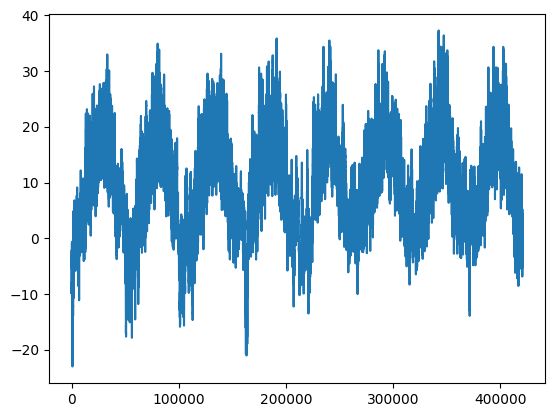

In [ ]:
from matplotlib import pyplot as plt


plt.plot(range(len(temperature)), temperature)
plt.show()

10분 마다 기록되었으므로 <10일 * 24시간 * 6단위(10분이 단위이므로 1시간은 6단위) =  1440)
아래의 그래프는 처음부터 10일까지의 온도의 시계열 그래프이다.

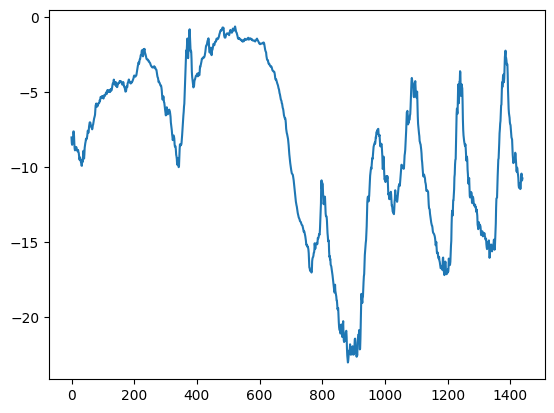

In [ ]:
plt.plot(range(1440), temperature[:1440])
plt.show()

이 그래프에서 일별 주기성을 볼 수 있습니다. 특히 마지막 4일간을 보면 확실합니다. 이 10일의 기간은 아주 추운 겨울에 해당합니다.
2009년 1월 1일 0시 10분부터 1월 11일 0시 0분까지 데이터 입니다.

## 항상 데이터에서 주기성을 찾으세요
#### 여러시간 범위에 걸친 주기성은 시계열 데이터에서 중요하고 매우 일반적인 성질입니다. 날씨, 쇼핑몰 주차 공간, 웹 사이트 트래픽, 식료품점 판매량, 피트니스 트래커에 기록된 걸음 수 등 어디에서나 일별 주기와 연간 주기성을 볼 수 있습니다.

(사람이 생성한 데이터도 매주 주기성을 가지는 경향이 있습니다.) 데이터를 탐색할 땐 이런 패턴을 찾아보세요

이 데이터 셋에서 지난 몇 달간 데이터를 사용하여 다음 달의 평균 온도를 예측하는 문제는 쉬운 편입니다. 연간 데이터 주기성은 안정적이기 때문입니다. 하지만 하루하루 데이터를 살펴보면 온도 변화는 매우 불안정합니다. 일자별 수준의 시계열 데이터를 예측할 수 있을까요? 직접확인해 보겠습니다.

모든 예제에서 처음 50%의 데이터를 훈련에 사용하고 다음 25%를 검증, 마지막 25%를 테스트에 사용하겠습니다. 시계열 데이터를 다룰 때 검증 데이터와 테스트 데이터가 훈련 데이터보다 최신이어야 합니다. 미래에서 과거를 예측하는 것이 아니라 과거를 바탕으로 미래를 예측하기 때문입니다. 이런 구도에 맞게 검증 테스트와 세트를 분할해야 합니다. 시간 축을 거꾸로 하면 어떤 문제는 아주 쉽게 해결됩니다.


In [ ]:
num_train_smaples= int(0.5*len(raw_data))
num_val_samples = int(0.25*len(raw_data))
num_test_samples = len(raw_data) - num_train_smaples - num_val_samples
print("num_train_smaples:", num_train_smaples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_smaples: 210225
num_val_samples: 105112
num_test_samples: 105114


## 데이터 준비
이 문제의 정확한 정의는 다음과 같습니다. 한 시간에 한번씩 샘플링된 5일간의 데이터가 주어졌을 때 24시간 뒤의 온도를 예측할 수 있을까요?

먼저 데이터를 신경망에 주입할 수 있는 형태로 전처리해 보겠습니다. 이작업은 쉽습니다. 데이터가 이미 수치형이기 때문에 어떤 벡터화도 필요하지 않습니다.

하지만 이 데이터에 있는 시계열은 스케일이 각기 다릅니다.(예를 들어 mbar로 측정된 기업은 약 1000이지만 H2OC는 mmol/mol로 측정되어 약 3정도 입니다.) 각 시계열을 독립적으로 정규화하여 비숫한 범위를 가진 작은 값으로 바꾸겠습니다.

처음 21만 225의 타임스텝을 훈련 데이터로 사용하므로 이 범위에서 평균과 표준편차를 계산합니다.


In [ ]:
mean = raw_data[:num_train_smaples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_smaples].std(axis=0)
raw_data /= std

이제 과거 5일치 데이터와 24시간 뒤 타깃 온도의 배치를 반환하는 Dataset 객체를 만들어 보겠습니다. 이 데이터셋에 있는 샘플은 중복이 많습니다.(샘플 N과 샘플 N + 1은 대부분 다임스텝이 중복되어 있습니다) 모든 샘플을 메모리에 적재하면 낭비가 심합니다. 그 대신 raw_Data와 temperature 배열만 메모리에 유지하고 그때그때 샘플을 생성하겠습니다.
파이썬 제너레이터를 만들어 처리할 수 있지만 케라스에 내장된 데이터셋 유틸리티(timeseries_dataset_from_array()) 가 있습니다. 이를 사용하면 수고를 덜 수 있습니다. 이 함수는 모든종류의 시계열 예측 작업에 일반적으로 사용할 수 있습니다.


###timeseries_dataset_from_array() 이해하기

timeseries_dataset_from_array() 함수의 작동 방식을 이해하기 위해 간단한 예를 살펴보죠. 시계열 데이터 배열을 (data 매개변수에) 제공하면 tiemseries_dataset_from_arrya() 함수가 원본 시계열에서 추출한 윈도우를 제공합니다.(이를 '시퀀스(sequence)'라고 부릅니다.)

예를 들어 data = [0 1 2 3 4 5 6]과 sequence_length =3 을 timeseries_dataset_from_array() 함수에 전달하면 [0 1 2], [1 2 3], [2 3 4], [3 4 5], [4 5 6]과 같은 샘플을 생성합니다.

timeseries_dataset_from_arrya() 함수에 targets 매개변수로 타깃 배열을 전달할 수 있습니다. targets 배열의 첫번째 원소는 data 배열에서 생성될 첫번째 시퀀스에 대한 타깃에 해당되어야 합니다. 따라서 시계열 예측을 수행한다면 targets는 약간의 시간차를 두고 data 배열과 동일해야 합니다.

예를 들어 data = [0 1 2 3 4 5 6 ...]과 sequence_length = 3 인경우 targets = [3 4 5 6 ...] 을 전달하여 이 시계열에서 다음 스텝을 예측하는 데이터 셋을 만들 수 있습니다. 한 번 테스트 해보죠.


In [ ]:
import numpy as np
from tensorflow import keras

int_sequence = np.arange(10)  ## 0에서 9까지 정렬된 정수 배열을 만듭니다.
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],  ## 생성할 시퀀스는 [0 1 2 3 4 5 6]에서 샘플링됩니다.
    targets=int_sequence[3:],  ## data[N]에서 시작하는 시퀀스의 타깃은 data[N+3]이 됩니다.
    sequence_length=3, ## 이 시퀀스의 길이는 3스텝입니다.
    batch_size=2, ## 이 시퀀스의 배치 크기는 2입니다.
)

for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


timeseries_dataset_from_array()를 사용해서, 훈련, 검증, 테스트를 위해 3개의 데이터셋을 만들겠습니다.
다음과 같은 매개변수 값을 사용하겠습니다.
 * sampling_rate = 6 : 시간당 하나의 데이터 포인트가 샘플링됩니다. 즉, 6개의 데이터 포인트 중 하나만 사용하겠습니다.
 * sequence_length = 120 : 이전 5일간(120시간) 데이터를 사용합니다.
 * delay = sampling_rate * (sequence_length + 24 -1): 시퀀스의 타깃은 시퀀스 끝에서 24시간 후의 온도입니다.

훈련 데이터셋을 만들 때 처음 50%의 데이터만 사용하기 위해 start_index=0과 end_index=num_train_samples로 지정합니다. 검증 데이터셋의 경우 그 다음 25%를 사용하기 위해 start_index = num_train_samples + num_val_samples로 지정합니다. 마지막으로 테스트 데이터셋의 경우 남은 샘플을 사용하기 위해 start_index = num_train_samples + num_val_samples로 지정합니다.



In [ ]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

In [ ]:
train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_smaples
)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_smaples,
    end_index=num_train_smaples + num_val_samples
)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_smaples + num_val_samples
)

각 데이터셋은(samples, targets) 크기의 튜플을 반환합니다. samples는 256개의 샘플로 이루어진 배치입니다. 각 샘플은 연속된 120시간의 입력 데이터를 담고 잇씁니다. targets는 256개의 타깃 온도에 해당하는 배열입니다. 샘플이 랜덤하게 섞여있기 때문에 배치에 있는 연속된 두샘플(예를 들어 samples[0]과 samples[1])이 꼭 시간적으로 가까운 것은 아닙니다.

## 상식 수준의 기준점
블랙박스 같은 딥러닝 모델을 사용하여 온도 예측 문제를 풀기 전에 간단한 상식 수준의 해법을 시도해 보겠습니다. 이는 정상적인 문제인지 확인하기 위한 용도이며 고수준 머신러닝 모델이라면 뛰어넘어야 할 기준점이 됩니다. 이런 상식 수준의 해법은 알려진 해결책이 없는 새로운 문제를 다루어야 할 때 유용합니다. 고전적인 예는 일부 클래스가 월등히 많아 불균형한 분류작업의 경우입니다. 데이터셋에 클래스 A의 샘플이 90%, 클래스 B의 샘플이 10%가 있다면, 이 분류 문제에 대한 상식 수준의 접근법은 새로운 샘플을 항상 클래스 'A'라고 예측하는 것입니다. 이 분류기는 대략 90%의 정확도를 낼 것입니다. 머신 러닝 기반의 모델이라면 90% 이상을 달성해야 유용하다고 볼 수 있습니다. 이따금 이런 기본적인 기준점을 넘어서기가 아주 어려운 경우가 있습니다.

이 경우 시계열 데이터는 연속성이 있고 일자별로 주기성을 가진다고 가정할 수 있습니다.(오늘 온도는 내일 온도와 비슷할 가능성이 높습니다.) 그렇기 때문에 상식수준의 해결책은 지금으로부터 24시간 후 온도는 지금과 동일하다고 예측하는 것입니다. 이 방법을 다음과 같이 정의된 평균 절대값 오차(MAE)로 평가해 보겠습니다.


```
np.mean(np.abs(preds - target))
```



In [ ]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]  ## 온도 특성은 칼럼 인덱스 1에 있습니다. 따라서 samples[:, -1,1]이 입력 시퀀스에 있는 마지막 온도 측정값입니다. 특성을 정규화했기 때문에 온도를 섭씨로 바꾸려면 표준편차를 곱하고 평균을 더해야 합니다.
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 2.44
Test MAE: 2.62


상식 수준의 모델은 섭씨 2.44도의 검증 2.62 도의 테스트 MAE를 달성했습니다. 따라서 24시간 후의 온도를 항상 현재와 같다고 예측하면 평균적으로 2.5도 정도 차이가 날 것입니다. 아주 나쁘지는 않지만 이런 규칙을 기반으로 날씨 예보 서비스를 시작하지는 않을 것입니다. 이제 딥러닝 모델이 더 나은지 시도해 보겠습니다.

## 기본적인 머신 러닝 모델 시도해 보기
머신 러닝 모델을 시도하기 전에 상식 수준의 기준점을 세워 놓았습니다. 비슷하게 RNN처럼 복잡하고 연산 비용이 많이 드는 모델을 시도하기 전에 간단하고 손쉽게 만들 수 있는 머신 러닝 모델(예를 들어 소규모의 완전 연결 네트워크)을 먼저 만드는 것이 좋습니다. 이를 바탕으로 더 복잡한 방법을 도입하는 근거가 마련되고 실제적인 이득도 얻게 될 것입니다.

다음 코드는 데이터를 펼쳐서 2개의 Dense 층을 통과시키는 완전 연결 네트워크를 보여줍니다. 전형적인 회귀문제이므로 마지막 Dense 층에 활성화 함수를 두지 않았습니다. 손실 함수로 MAE 대신 평균제곱 오차(MSE)를 사용합니다. MSE는 원점에서 미분 가능하기 떄문에 경사 하강법에 잘 맞습니다. MSE는 원점에서 미분 가능하기 때문에 경사 하강법에 잘 맞습니다. compile() 메서드에 모니터링할 지표로 MAE를 추가합니다.

In [ ]:
raw_data

array([[ 0.91365151, -1.92064015, -1.97449272, ..., -0.73016651,
        -0.77935289, -0.28119316],
       [ 0.91953033, -1.96510495, -2.01848295, ..., -0.93230685,
        -0.88696976, -0.46989368],
       [ 0.91482727, -1.97650618, -2.0297625 , ..., -1.27790162,
        -1.26147647, -0.05638329],
       ...,
       [ 1.30165361, -1.36654038, -1.45450563, ..., -0.69756323,
        -0.67173602,  0.45147737],
       [ 1.30047784, -1.48853354, -1.57519677, ..., -0.43021634,
        -0.60286122,  0.57494808],
       [ 1.30165361, -1.5558008 , -1.64061814, ..., -0.59975339,
        -0.68895472,  0.09853751]])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# 입력 텐서 정의
# sequence_length는 입력 시퀀스의 길이.
# raw_data.shape[-1]은 입력 데이터의 마지막 차원의 크기(즉, 특성의 수).
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))

# 모델 아키텍처 구성
# Flatten 레이어: 입력을 1차원으로 평탄화.
x = layers.Flatten()(inputs)
# Dense 레이어: 16개의 뉴런을 가진 은닉층, ReLU 활성화 함수 사용
x = layers.Dense(16, activation="relu")(x)
# 출력층: 1개의 뉴런을 가진 출력층.
outputs = layers.Dense(1)(x)
# 입력과 출력을 연결하여 모델을 생성.
model = keras.Model(inputs, outputs)

## 콜백정의 : 모델을 훈련하는 동안 가장 좋은 성능을 보이는 모델을 "jena_dense.h5" 파일에 저장.
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.h5", save_best_only=True)
]
# 모델 컴파일
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])  # 옵티마이저: RMSprop , 손실 함수: 평균 제곱 오차(MSE) , 평가 지표: 평균 절대 오차(MAE).

# 모델 훈련
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks) #train_dataset을 사용하여 10 에포크 동안 모델을 훈련 , val_dataset을 사용하여 검증, 콜백을 사용하여 가장 좋은 모델을 저장.
model = keras.models.load_model("jena_dense.h5")  # 저장된 모델을 로드.
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")  # 테스트 데이터셋으로 모델을 평가.

Epoch 1/10
819/819 [==============================] - 33s 39ms/step - loss: 12.2678 - mae: 2.7086 - val_loss: 10.3289 - val_mae: 2.5371


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
819/819 [==============================] - 32s 39ms/step - loss: 8.9117 - mae: 2.3459 - val_loss: 11.1221 - val_mae: 2.6469
Epoch 3/10
819/819 [==============================] - 31s 38ms/step - loss: 8.2360 - mae: 2.2528 - val_loss: 10.6888 - val_mae: 2.5894
Epoch 4/10
819/819 [==============================] - 32s 39ms/step - loss: 7.8063 - mae: 2.1973 - val_loss: 10.3272 - val_mae: 2.5400
Epoch 5/10
819/819 [==============================] - 31s 37ms/step - loss: 7.5090 - mae: 2.1549 - val_loss: 13.0870 - val_mae: 2.8748
Epoch 6/10
819/819 [==============================] - 32s 39ms/step - loss: 7.2709 - mae: 2.1216 - val_loss: 11.0139 - val_mae: 2.6237
Epoch 7/10
819/819 [==============================] - 31s 38ms/step - loss: 7.1265 - mae: 2.1017 - val_loss: 10.4802 - val_mae: 2.5591
Epoch 8/10
819/819 [==============================] - 31s 38ms/step - loss: 6.9628 - mae: 2.0758 - val_loss: 11.4284 - val_mae: 2.6701
Epoch 9/10
819/819 [==============================] - 3

훈련과 검증 손실 곡선입니다.

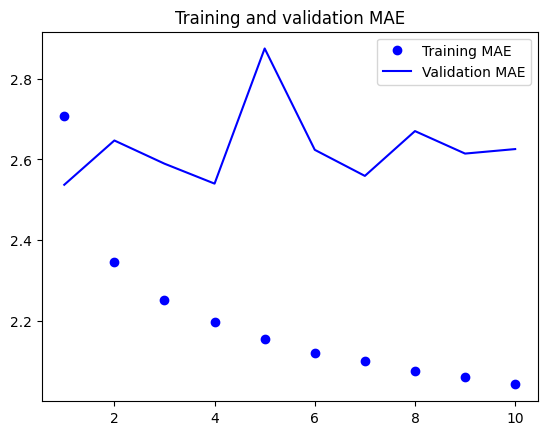

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

위의 학습모델은 과적합이 발생한 것을 알수있다.

###과적합 (Overfitting):
특징: 훈련 MAE는 낮아지지만, 검증 MAE는 일정 시점 이후 높아지기 시작하거나, 훈련 MAE와 큰 차이가 나는 경우.
그래프 해석:
초기 단계: 훈련 MAE와 검증 MAE 모두 감소.
후기 단계: 훈련 MAE는 계속 감소하지만, 검증 MAE는 증가 또는 일정하게 유지.
결론: 모델이 훈련 데이터에 너무 맞추어져서, 새로운 데이터(검증 데이터)에 대한 일반화 능력이 떨어짐.
###과소적합 (Underfitting):
특징: 훈련 MAE와 검증 MAE 모두 높은 값을 유지하고, 줄어들지 않는 경우.
그래프 해석:
훈련 MAE와 검증 MAE가 비슷한 값을 유지하면서 높은 값을 가짐.
훈련과 검증 과정 모두에서 성능이 좋지 않음.
결론: 모델이 충분히 학습하지 못해, 훈련 데이터와 검증 데이터 모두에서 좋은 성능을 발휘하지 못함.
###적절한 학습:
특징: 훈련 MAE와 검증 MAE가 모두 낮아지며, 큰 차이가 나지 않는 경우.
그래프 해석:
훈련 MAE와 검증 MAE가 비슷하게 감소.
일정 수준에서 두 값이 안정화.
결론: 모델이 훈련 데이터와 검증 데이터 모두에 대해 잘 일반화되고 있음.
###예시:
####과적합 예시:

훈련 MAE: 지속적으로 감소하여 낮은 값.
검증 MAE: 일정 시점 이후 증가 또는 높은 값 유지.

####과소적합 예시:

훈련 MAE: 높은 값 유지.
검증 MAE: 높은 값 유지.

####적절한 학습 예시:

훈련 MAE: 지속적으로 감소하여 낮은 값.
검증 MAE: 지속적으로 감소하여 낮은 값.

###결론:
과적합 방지 방법: 모델의 복잡도 줄이기, 정규화 기법 적용, 더 많은 훈련 데이터 사용.
과소적합 방지 방법: 모델의 복잡도 증가, 더 많은 학습, 적절한 하이퍼파라미터 튜닝.

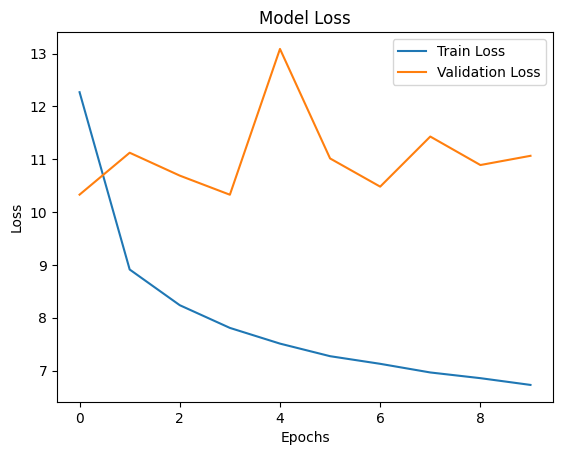

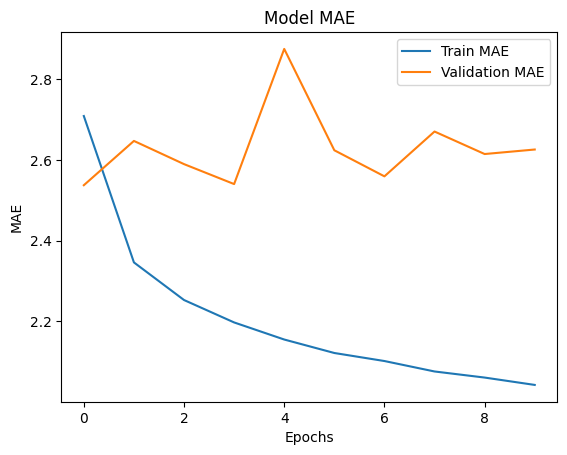

In [ ]:
# 학습 및 검증 손실 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 학습 및 검증 MAE 시각화
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

일부 검증 손실은 학습을 사용하지 않은 기준점에 가깝지만 안정적이지 못합니다. 앞서 기준 모델을 만든 것이 도움이 됩니다. 이 문제는 기준 모델의 성능을 앞지르기가 쉽지 않습니다. 우리가 적용한 상식에는 머신러닝 모델이 찾지 못한 핵심 정보가 많이 포함되어 있습니다.

간단하고 괜찮은 성능을 내는 모델(상식 수준의 기준 모델)이 데이터와 타깃을 매핑할 수 있다면 왜 훈련한 모델은 이를 찾지 못하고 성능이 낮을까요? 문제 해결을 위해 탐색하는 모델의 공간, 즉 가설공간은 우리가 매개변수로 설정한 2개의 층을 가진 네트워크의 모든 가능한 가중치 조합입니다. 상식 수준의 모델은 이 공간에서 표현할 수 있는 수백만 가지 중 하나일 뿐입니다. 이는 모래사장에서 바늘을 찾는 것과 같습니다. 기술적으로 가설 공간에서 좋은 솔루션이 존재한다는 것이 경사 하강법으로 찾을 수 있다는 의미는 아니기 때문입니다.

이것이 일반적으로 머신 러닝이 가진 심각한 제약 사항입니다. 특정한 종류의 간단한 모델을 찾도록 학습 알고리즘을 하드코딩하지 않았다면, 종종 간단한 문제를 위한 간략한 해결책을 찾지 못할 수 있습니다. 이것이 좋은 특성 공학과 문제와 관련된 아키텍처 구조를 활용하는 것이 중요한 이유입니다. 즉, 모델이 찾아야 할 것은 정확하게 알려주어야 합니다.

###Conv2D (2차원 합성곱 층)
####역할: 2D 입력 (예: 이미지)을 처리하기 위해 사용됩니다.
####원리: 작은 2D 필터(커널)가 입력 이미지 위를 슬라이딩하며 합성곱을 수행합니다.
####예시:


```
from tensorflow.keras.layers import Conv2D

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))

```
 * filters=32: 32개의 필터를 사용
 * kernel_size=(3, 3): 3x3 크기의 필터
 * input_shape=(64, 64, 3): 64x64 크기의 RGB 이미지 입력



###SeparableConv2D (분리 가능한 2차원 합성곱 층)
####역할: Conv2D와 유사하지만, 계산 효율성을 높이기 위해 필터를 깊이 방향과 공간 방향으로 분리하여 합성곱을 수행합니다.
####원리: 먼저 깊이 방향(depthwise) 합성곱을 수행하고, 이어서 점별(pointwise) 합성곱(1x1)을 수행합니다. 이는 모델의 파라미터 수와 계산 복잡도를 줄여줍니다.
####예시:


```
from tensorflow.keras.layers import SeparableConv2D

model.add(SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))

```
 * filters=32: 32개의 필터 사용
 * kernel_size=(3, 3): 3x3 크기의 필터
 * input_shape=(64, 64, 3): 64x64 크기의 RGB 이미지 입력


###Conv1D (1차원 합성곱 층)
####역할: 시계열 데이터 또는 1D 시퀀스 데이터를 처리하기 위해 사용됩니다.
####원리: 작은 1D 필터가 입력 시퀀스 위를 슬라이딩하며 합성곱을 수행합니다. 이는 시퀀스의 특정 패턴을 인식하고 추출하는 데 유용합니다.
####예시:


```
from tensorflow.keras.layers import Conv1D

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(100, 1)))

```
 * filters=32: 32개의 필터 사용
 * kernel_size=3: 3개의 타임 스텝을 포함하는 필터
 * input_shape=(100, 1): 100개의 타임 스텝을 가진 1D 시퀀스 입력


###Conv3D (3차원 합성곱 층)
####역할: 3D 입력 (예: 비디오 데이터)을 처리하기 위해 사용됩니다.
####원리: 작은 3D 필터가 입력 볼륨 위를 슬라이딩하며 합성곱을 수행합니다.
####예시:



```
from tensorflow.keras.layers import Conv3D

model.add(Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu', input_shape=(64, 64, 64, 3)))

```
 * filters=32: 32개의 필터 사용
 * kernel_size=(3, 3, 3): 3x3x3 크기의 필터
 * input_shape=(64, 64, 64, 3): 64x64x64 크기의 3D 입력 (예: 비디오 프레임)


## 요약:
###Conv2D: 이미지와 같은 2D 데이터를 처리.
###SeparableConv2D: 효율성을 높이기 위해 깊이 방향과 공간 방향으로 분리된 합성곱 수행.
###Conv1D: 시계열 데이터 또는 1D 시퀀스 데이터를 처리.
###Conv3D: 비디오 데이터와 같은 3D 데이터를 처리.

##1D 합성곱 모델의 활용:
####1D 합성곱 신경망은 일별 주기를 가지는 시계열 데이터를 처리할 때 유용합니다. 시간 축에 대한 합성곱을 통해 시퀀스의 특정 패턴을 인식하고, 이 패턴이 시퀀스의 다른 위치에서도 유사하게 나타나는 경우 이를 효과적으로 추출할 수 있습니다. 이를 통해 시계열 데이터에서의 중요한 특징을 추출하여 예측 성능을 향상시킬 수 있습니다.






## 1D 합성곱 모델 시도해 보기
올바른 아키텍처 구조를 활용하는 측면을 보면 입력 시퀀스가 일별 주기를 가지기 때문에 합성곱 모델을 적용할 수 있습니다. 시간 축에 대한 합성곱은 다른 날에 있는 동일한 표현을 재사용할 수 있습니다. 마치 공간 방향 합성곱이 이미지에서 다른 위치에 있는 같은 표현을 재사용하는 것과 같습니다.

이미 Conv2D와 SeparableConv2D 층에 대해 배웠습니다. 이 층들은 작은 윈도우로 2D 그리드 위를 이동하면서 입력을 바라봅니다. 1D 그리고 심지어 3D 합성곱도 있습니다. Conv1D, SeparableConv1D, Conv3D 입니다. Conv1D 층은 1D 윈도우를 사용하여 입력 시퀀스를 슬라이딩합니다. Conv3D 층은 정육면체 윈도우를 사용하여 입력 볼륨 위를 슬라이딩합니다.

따라서 2D 컨브넷과 매우 유사한 1D 컨브넷을 만들 수 있습니다. 평행 이동 불변성 가정을 따르는 어떤 시퀀스 데이터에도 잘 맞습니다.(즉, 시퀀스 위로 윈도우를 슬라이딩하면 윈도우 안의 내용이 위치에 상관없이 동일한 설질을 가진다는 의미입니다.)

이를 온도 예측문제에 적용해 보겠습니다. 초기 윈도우 길이는 24로 정합니다. 따라서 한 번(한 주기)에 24시간의 데이터를 보게 됩니다. (Maxpooling1D 층으로) 시퀀스를 다운샘플링하기 때문에 그에 맞추어 윈도우의 크기를 줄이겠습니다.


In [ ]:
## 입력 텐서 정의:
# sequence_length는 입력 시퀀스의 길이.
# raw_data.shape[-1]은 입력 데이터의 마지막 차원의 크기(즉, 특성의 수).
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))

# 모델 아키텍처 구성:
# 합성곱 층 1: Conv1D(8, 24, activation="relu")는 8개의 필터와 커널 크기 24를 사용하여 입력 데이터를 처리합니다
x = layers.Conv1D(8, 24, activation="relu")(inputs)
# 풀링 층 1: MaxPooling1D(2)는 2의 크기로 최대 풀링을 수행하여 데이터의 공간적 차원을 줄입니다.
x = layers.MaxPooling1D(2)(x)
# 합성곱 층 2: Conv1D(8, 12, activation="relu")는 8개의 필터와 커널 크기 12를 사용합니다.
x = layers.Conv1D(8, 12, activation="relu")(x)
# 풀링 층 2: MaxPooling1D(2)는 다시 최대 풀링을 수행합니다.
x = layers.MaxPooling1D(2)(x)
# 합성곱 층 3: Conv1D(8, 6, activation="relu")는 8개의 필터와 커널 크기 6을 사용합니다.
x = layers.Conv1D(8, 6, activation="relu")(x)
# 글로벌 평균 풀링: GlobalAveragePooling1D()는 시퀀스의 모든 타임 스텝에 대해 평균을 계산하여 차원을 축소합니다.
x = layers.GlobalAveragePooling1D()(x)
# 출력층: Dense(1)는 최종 예측값을 생성합니다.
outputs = layers.Dense(1)(x)
# 입력과 출력을 연결하여 모델을 생성합니다.
model = keras.Model(inputs, outputs)

# 콜백 정의:
# 모델을 훈련하는 동안 가장 좋은 성능을 보이는 모델을 "jena_conv.h5" 파일에 저장합니다.
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_conv.h5", save_best_only=True)
]
# 모델 컴파일:
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"]) # 옵티마이저로 RMSprop을 사용합니다, 손실 함수로 평균 제곱 오차(MSE)를 사용합니다 , 평가 지표로 평균 절대 오차(MAE)를 사용합니다.
# 모델 훈련:
# train_dataset을 사용하여 10 에포크 동안 모델을 훈련합니다.
# val_dataset을 사용하여 검증합니다.
# 콜백을 사용하여 가장 좋은 모델을 저장합니다.
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

# 최적 모델 로드 및 평가:
# 저장된 최적의 모델을 로드합니다.
# test_dataset을 사용하여 모델을 평가하고, 테스트 데이터셋에서의 MAE를 출력합니다.
model = keras.models.load_model("jena_conv.h5")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 106s 126ms/step - loss: 21.9477 - mae: 3.6529 - val_loss: 15.8949 - val_mae: 3.1709
Epoch 2/10
819/819 [==============================] - 87s 106ms/step - loss: 15.4777 - mae: 3.1246 - val_loss: 14.3330 - val_mae: 2.9880
Epoch 3/10
819/819 [==============================] - 91s 110ms/step - loss: 14.1699 - mae: 2.9896 - val_loss: 14.3993 - val_mae: 3.0086
Epoch 4/10
819/819 [==============================] - 89s 108ms/step - loss: 13.3142 - mae: 2.8967 - val_loss: 16.3646 - val_mae: 3.1936
Epoch 5/10
819/819 [==============================] - 95s 115ms/step - loss: 12.6850 - mae: 2.8257 - val_loss: 15.1225 - val_mae: 3.0672
Epoch 6/10
819/819 [==============================] - 86s 104ms/step - loss: 12.2030 - mae: 2.7678 - val_loss: 15.7524 - val_mae: 3.1454
Epoch 7/10
819/819 [==============================] - 92s 111ms/step - loss: 11.8080 - mae: 2.7197 - val_loss: 14.4294 - val_mae: 2.9967
Epoch 8/10
819/819 [====================

###요약:
####모델 정의: 1차원 합성곱 신경망(CNN) 모델을 정의하여 시계열 데이터의 특성을 추출합니다.
####훈련: RMSprop 옵티마이저와 MSE 손실 함수를 사용해 모델을 훈련하고, 검증 데이터셋을 통해 최적의 모델을 선택합니다.
####저장 및 로드: 최적의 모델을 파일에 저장하고, 나중에 로드하여 테스트 데이터셋으로 평가합니다.
####평가: 테스트 데이터셋을 통해 최적 모델의 성능(MAE)을 평가하고 출력합니다.

#### 이 과정은 시계열 데이터에 적합한 합성곱 신경망을 사용하여 예측 모델을 구축하고 그 성능을 검증하는 전체적인 워크플로우를 보여줍니다.

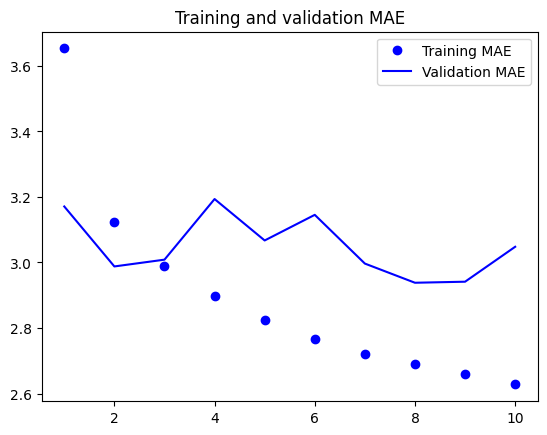

In [ ]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

결과적으로 과대적합이 발생한것을 알수 있다

결과를 보면 이 모델은 밀집 연결모델 보다 더 성능이 나쁩니다. 약 2.9도의 검증 MAE를 달성하여 상식수준의 모델과 차이가 큽니다. 무엇이 문제일까요? 두가지가 있습니다.
  * 첫째, 날씨 데이터는 평생 이동 불션성 가정을 많이 따르지 않습니다. 데이터에 일별 주기성이 있지만 아핌 데이터는 저녁이나 한밤중의 데이터와 성질이 다릅니다. 날씨 데이터는 매우 특정한 시간 범위에 대해서만 평행이동 불변성을 가집니다.

  * 둘째, 이 데이터는 순서가 많이 중요합니다. 최근 데이터가 5일 전 데이터보다 내일 온도를 예측하는데 훨씬 더 유용합니다. 1D 컨브넷은 이런 사실을 활용할 수 없습니다. 특히 최대풀링과 전역 평균 풀링 층 때문에 순서 정보가 많이 삭제됩니다.

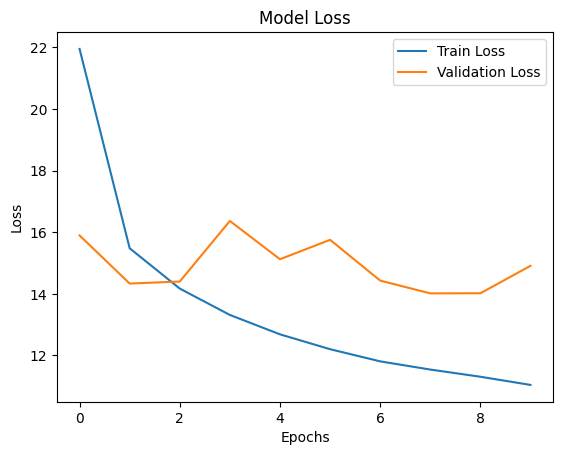

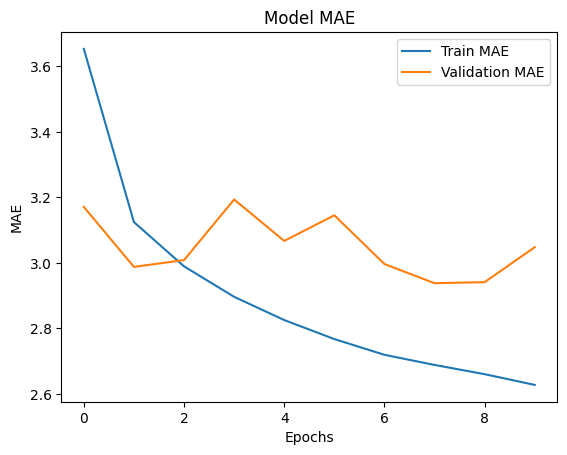

In [ ]:
# 학습 및 검증 손실 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 학습 및 검증 MAE 시각화
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

Loss 와 MAE 모두 과대적합이 발생하였다.

## 첫번째 순환 신경망

밀집 연결 모델이나 합성곱 모델이 잘 작동하지 않았지만 그렇다고 이 문제에 머신러닝이 적합하지 않다는 뜻은 아닙니다. 밀집 연결 모델은 시계열 데이터를 펼쳤기 때문에 입력데이터에서 시간 개념을 잃어 버렸습니다. 합성곱 모델은 데이터의 모든 부분을 비슷한 방식으로 처리했으며 풀링을 적용하여 순서정보를 잃어버렸습니다. 이런 방법 대신 인과관계와 순서가 의미 있는 시퀀스 데이터를 그랟로 사용해 보겠습니다.

이런 문제를 위해 특별히 고안된 신경망 구조가 순환 신경망입니다. 그중에서도 LSTM(Long short-Term Memory) 층이 오랫동안 인기가 많았습니다. 잠시 후에 이 모델이 어떻게 작동하는지 알아보겠습니다. 지금은 LSTM 층을 일단 적용해 보죠.

In [ ]:
# 입력 텐서 정의:
# sequence_length는 입력 시퀀스의 길이
# raw_data.shape[-1]은 입력 데이터의 마지막 차원의 크기(즉, 특성의 수).
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))

# 모델 아키텍처 구성:
# LSTM 레이어: LSTM(16)는 16개의 유닛을 가진 LSTM 레이어를 정의합니다. 이 레이어는 시계열 데이터의 패턴을 학습하는 데 사용됩니다.
x = layers.LSTM(16)(inputs)
# 출력층: Dense(1)는 최종 예측값을 생성합니다. 하나의 출력 값을 가지며, 이는 예측하려는 시계열 데이터의 다음 값을 의미합니다.
outputs = layers.Dense(1)(x)
# 입력과 출력을 연결하여 모델을 생성합니다.
model = keras.Model(inputs, outputs)

# 콜백 정의:
# 모델을 훈련하는 동안 가장 좋은 성능을 보이는 모델을 "jena_lstm.h5" 파일에 저장합니다.
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.h5", save_best_only=True)
]

# 모델 컴파일:
# 옵티마이저로 RMSprop을 사용합니다.
# 손실 함수로 평균 제곱 오차(MSE)를 사용합니다.
# 평가 지표로 평균 절대 오차(MAE)를 사용합니다.
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# 모델 훈련:
# train_dataset을 사용하여 10 에포크 동안 모델을 훈련합니다.
# val_dataset을 사용하여 검증합니다.
# 콜백을 사용하여 가장 좋은 모델을 저장합니다.
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

# 최적 모델 로드 및 평가:
# 저장된 최적의 모델을 로드합니다.
model = keras.models.load_model("jena_lstm.h5")
# test_dataset을 사용하여 모델을 평가하고, 테스트 데이터셋에서의 MAE를 출력합니다.
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 117s 139ms/step - loss: 37.9894 - mae: 4.4631 - val_loss: 11.7636 - val_mae: 2.6231
Epoch 2/10
819/819 [==============================] - 113s 138ms/step - loss: 10.6948 - mae: 2.5447 - val_loss: 9.5425 - val_mae: 2.3978
Epoch 3/10
819/819 [==============================] - 124s 151ms/step - loss: 9.5848 - mae: 2.4185 - val_loss: 9.5566 - val_mae: 2.3928
Epoch 4/10
819/819 [==============================] - 105s 128ms/step - loss: 9.1471 - mae: 2.3636 - val_loss: 9.7641 - val_mae: 2.4163
Epoch 5/10
819/819 [==============================] - 124s 151ms/step - loss: 8.8890 - mae: 2.3276 - val_loss: 9.8922 - val_mae: 2.4247
Epoch 6/10
819/819 [==============================] - 117s 142ms/step - loss: 8.6999 - mae: 2.3004 - val_loss: 9.8761 - val_mae: 2.4200
Epoch 7/10
819/819 [==============================] - 111s 136ms/step - loss: 8.5280 - mae: 2.2741 - val_loss: 9.8299 - val_mae: 2.4201
Epoch 8/10
819/819 [=========================

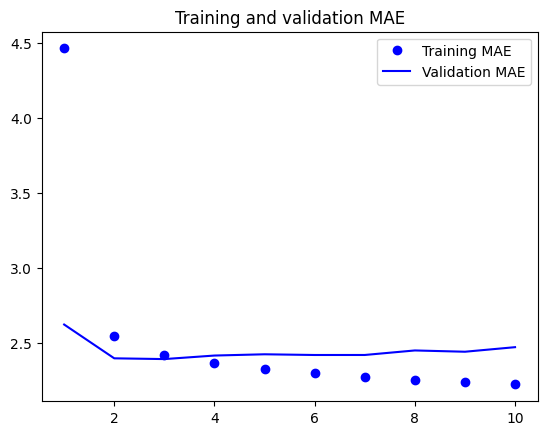

In [ ]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

과대적합 혹은 과소적합 문제가 발생하지 않았으며 적절한 학습이 이루어 졌습니다.

실행결과입니다. 가장 낮은 검증 MAE는 2.4 정도이고 테스트 MAE는 2.25 정도를 달성 했습니다. LSTM기반 모델이 드디어 상식 수준의 모델을(아직은 약간이지만) 앞질렀으며 이 작업에서 머신러닝의 가치를 보여줍니다.

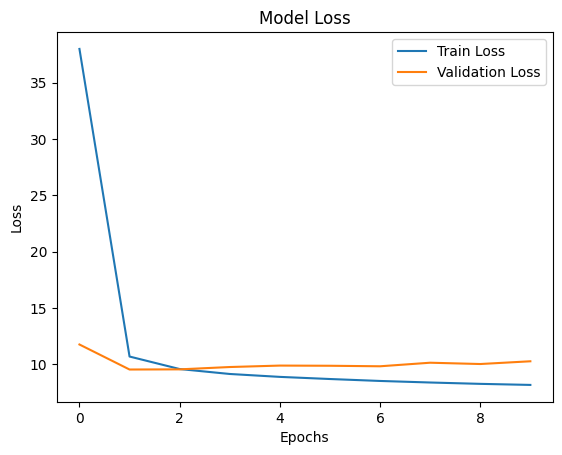

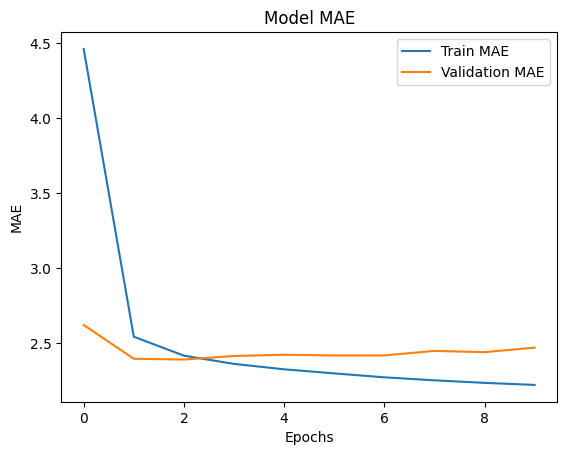

In [ ]:
# 학습 및 검증 손실 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 학습 및 검증 MAE 시각화
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

과대적합 혹은 과소적합 문제가 발생하지 않았으며 적절한 학습이 이루어 졌습니다.

LSTM 모델이 밀집 연결 모델이나 컨브넷보다 뛰어난 성능을 내는 이유가 무엇일까요? 이모델을 더 개선할 수 있을까요? 이에 대한 답을 얻기위해 순환 신경망에 대해 자세히 알아보겠습니다.

# 순환신경망 이해하기

밀집 연결 네트워크나 컨브넷처럼 지금까지 본 모든 신경망의 특징은 메모리가 없다는 것입니다. 네트워크에 주입되는 입력은 개별적으로 처리되며 입력 간에 유지되는 상태가 없습니다. 이런 네트워크로 시퀀스나 시계열 데이터 포인트를 처리하려면 네트워크에 전체 시퀀스를 주입해야 합니다. 즉, 전체 시퀀스를 하나의 테이터 포인트로 변환해야 합니다. 예를 들어 밀집 연결 모델에서 보았듯이 5일치 데이터를 펼쳐서 하나의 큰 벡터로 만들어 처리했습니다. 이런 네트워크를 피드포워드 네트워크(feedforward network)라고 합니다.

이와 반대로 사람은 문장을 읽을 때 이전에 나온것을 기억하면서 단어별로 또는 한눈에 들어오는 만큼씩 처리합니다. 이는 문장에 있는 의미를 자연스럽게 표현하도록 도와줍니다. 생물학적 지능은 정보 처리를 위한 내부 모델을 유지하면서 점진적으로 정보를 처리합니다. 이 모델은 과거 정보를 사용하여 구축되며 새롭게 얻은 정보를 계속 업데이트 합니다.

비록 극단적으로 단순화시킨 버전이지만 순환 신경망(Recurrent Neural Network, RNN) 은 같은 원리를 적용한 것입니다. 시퀀스의 원소를 순회하면서 지금까지 처리한 정보를 상태(state)에 저장합니다. 실제로 RNN은 내부에 루프(loop)를 가진 신경망의 한 종류입니다.

RNN의 상태는 (배치에 있는 2개의 다른 샘플처럼) 2개의 다른 시퀀스를 처리하는 사이에 재설정 됩니다. 따라서 하나의 시퀀스를 여전히 하나의 데이터 포인트, 즉 네트워크에 주입되는 하나의 입력으로 간주할 수 있습니다. 이 데이터 포인트가 한번에 처리되지 않는다는 것이 다릅니다. 그 대신 네트워크는 내부적으로 시퀀스의 원소를 순회합니다.

루프와 상태에 대한 개념을 명확히 하기 위해 간단한 RNN 정방향 계산을 구현해 보죠. 이 RNN은 (timestpes, input_features)크기의 랭크-2 텐서로 인코딩된 벡터의 시퀀스를 입력받습니다. 다임스텝을 따라 루프를 돌면서 각 타임스텝 t에서 현재 상태와 (크기가 (input_features, )인) 입력을 연결하여 출력을 계산합니다. 그 다음 이 출력을 다음 스텝의 상태로 설정합니다. 첫 번째 타임스텝에서는 이전 출력이 정의되지 않으므로 현재 상태가 없습니다. 이때는 네트워크 초기 상태(initial state)인 0벡터로 상태를 초기화합니다.
RNN을 의사코드(psuedocode)로 표현하면 다음과 같습니다.

In [ ]:
# 예시 input_sequence와 함수 f 정의
input_sequence = [1, 2, 3, 4]  # 예시 입력 시퀀스
def f(input_t, state_t):
    return input_t + state_t  # 간단한 예시 함수: 현재 입력과 상태를 더함

In [ ]:
# RNN 스타일의 계산:
state_t = 0
# 입력 시퀀스의 각 요소에 대해 순차적으로 함수를 적용하여 새로운 상태를 계산합니다.
# 각 타임 스텝의 입력 값 input_t에 대해 함수를 호출하여 output_t를 계산하고, 이 값을 새로운 상태 state_t로 업데이트합니다.
for input_t in input_sequence:
    output_t = f(input_t, state_t)
    state_t = output_t

In [ ]:
# 최종 출력 확인
print(f"Final state: {state_t}")

Final state: 10


f함수는 입력과 상태를 출력으로 변환합니다. 이를 2개의 행렬 W와 U 그리고 편향 벡터를 사용하는 변환으로 바꿀수 있습니다. 피드포워드 네트워크의 밀집연결 층에서 수행되는 변환과 비슷합니다.

In [ ]:
import numpy as np

# 예시 input_sequence와 가중치 정의
input_sequence = [1, 2, 3, 4]  # 예시 입력 시퀀스
W = np.array([0.5])  # 입력에 대한 가중치
U = np.array([0.8])  # 상태에 대한 가중치
b = np.array([0.1])  # 바이어스

# 활성화 함수 정의
def activation(x):
    return np.tanh(x)  # 예시로 하이퍼볼릭 탄젠트 사용

In [ ]:
# RNN 스타일의 계산:
state_t = 0
# 입력 시퀀스의 각 요소에 대해 순차적으로 함수를 적용하여 새로운 상태를 계산합니다.
# 각 타임 스텝의 입력 값 input_t에 대해 가중치와 바이어스를 적용하여 계산하고, 활성화 함수를 적용하여 output_t를 계산합니다.
# 계산된 output_t를 새로운 상태 state_t로 업데이트합니다.
for input_t in input_sequence:
    output_t = activation(np.dot(W, input_t) + np.dot(U, state_t) + b)
    state_t = output_t

np.dot() 함수는 NumPy 라이브러리에서 제공하는 함수로, 두 배열의 점곱(내적)을 계산하는 데 사용됩니다. 이를 통해 벡터와 벡터, 행렬과 벡터, 또는 행렬과 행렬 간의 곱셈을 수행할 수 있습니다.

####np.dot()의 역할과 사용 예시:
벡터와 벡터의 점곱:

 * 두 1차원 배열(벡터) 간의 내적을 계산합니다.
 * 수학적으로는 두 벡터의 대응하는 원소들의 곱을 모두 더한 값입니다.
 * 예시


```
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
result = np.dot(a, b)  # 결과: 1*4 + 2*5 + 3*6 = 32

```

행렬과 벡터의 곱:

 * 2차원 배열(행렬)과 1차원 배열(벡터)의 곱을 계산합니다.
 * 예시


```
A = np.array([[1, 2], [3, 4]])
b = np.array([5, 6])
result = np.dot(A, b)  # 결과: [1*5 + 2*6, 3*5 + 4*6] = [17, 39]

```

행렬과 행렬의 곱:

 * 두 2차원 배열(행렬) 간의 곱을 계산합니다.
 * 수학적으로는 첫 번째 행렬의 행과 두 번째 행렬의 열의 내적을 각 위치에 계산합니다.
 * 예시


```
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
result = np.dot(A, B)  # 결과: [[1*5 + 2*7, 1*6 + 2*8], [3*5 + 4*7, 3*6 + 4*8]] = [[19, 22], [43, 50]]

```
###위 코드에서 np.dot()의 사용:
위 코드에서는 np.dot() 함수를 사용하여 입력 값과 상태 값에 대한 가중치 곱을 계산합니다.

 * np.dot(W, input_t):
  * 여기서 W는 입력에 대한 가중치입니다.
  * input_t는 현재 타임 스텝의 입력 값입니다.
  * W와 input_t의 점곱은 입력 값에 대한 가중치 곱을 계산합니다.

 * np.dot(U, state_t):
  * 여기서 U는 상태에 대한 가중치입니다.
  * state_t는 현재 타임 스텝의 상태 값입니다.
  * U와 state_t의 점곱은 상태 값에 대한 가중치 곱을 계산합니다.

### 예제 계산:
 * 첫 번째 타임 스텝:

  * input_t = 1
  * state_t = 0 (초기 상태)
  * np.dot(W, input_t): np.dot(np.array([0.5]), 1) -> 0.5
  * np.dot(U, state_t): np.dot(np.array([0.8]), 0) -> 0
  * output_t = activation(0.5 + 0 + 0.1) -> activation(0.6) -> np.tanh(0.6) -> 0.5370495669980353
  * 새로운 state_t는 0.5370495669980353

* 두 번째 타임 스텝:

  * input_t = 2
  * state_t = 0.5370495669980353
  * np.dot(W, input_t): np.dot(np.array([0.5]), 2) -> 1.0
  * np.dot(U, state_t): np.dot(np.array([0.8]), 0.5370495669980353) -> 0.4296396535984283
  * output_t = activation(1.0 + 0.4296396535984283 + 0.1) -> activation(1.5296396535984283) -> np.tanh(1.5296396535984283) -> 0.9105923462587893
  * 새로운 state_t는 0.9105923462587893

이와 같은 방식으로 각 타임 스텝에서 입력 값과 상태 값을 계산하여 새로운 상태 값을 업데이트합니다.

In [ ]:
# 최종 출력 확인
print(f"Final state: {state_t}")

Final state: [0.99377921]


완전하게 이해하기 위해 간단한 RNN의 정방향 계산을 넘파이로 구현해보죠.

In [ ]:
import numpy as np

timesteps = 100   ## 입력 시퀀스에 있는 타임스텝의 수
input_features = 32  ## 입력 특성의 차원
output_features = 64  ## 출력 특성의 차원

inputs = np.random.random((timesteps, input_features))  ## 입력 데이터 : 예제를 위한 랜덤한 잡음
state_t = np.zeros((output_features,))  ## 초기 상태 : 0벡터
W = np.random.random((output_features, input_features))  ## 랜덤한 가중치 행렬을 만듭니다.
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)  ## 입력과 현재 상태(이전출력)를 연결하여 현재 출력을 얻습니다. tanh함수를 사용해서 비선형성을 추가합니다. (다른 활성화 함수도 사용할 수 있습니다.)
    successive_outputs.append(output_t) ## 출력을 리스트에 저장합니다.
    state_t = output_t  ## 다음 타임스텝을 위해 네트워크의 상태를 업데이트 합니다.
final_output_sequence = np.stack(successive_outputs, axis=0)  ## 최종 출력은(timesteos, output_feature) 크기의 랭크 -2 텐서입니다.


Final output sequence shape: (100, 64)


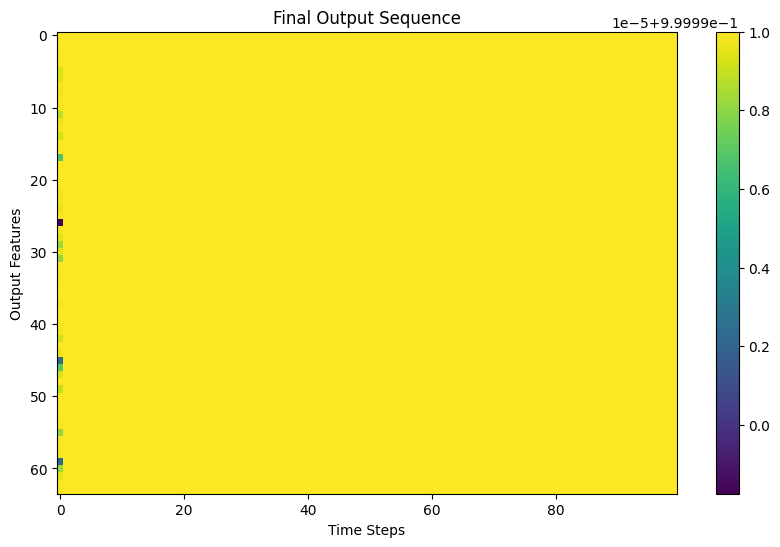

In [ ]:
# 결과 출력
print("Final output sequence shape:", final_output_sequence.shape)

# 시각화
plt.figure(figsize=(10, 6))
plt.imshow(final_output_sequence.T, aspect='auto', interpolation='nearest', cmap='viridis')
plt.colorbar()
plt.title('Final Output Sequence')
plt.xlabel('Time Steps')
plt.ylabel('Output Features')
plt.show()

요약하면 RNN은 반복할 때 이전에 계산한 정보를 재사용하는 for 루프에 지나지 않습니다. 물론 이 정의에 맞는 RNN의 종류는 많습니다. 이 예는 가장 간단한 RNN의 형태입니다. RNN은 스텝(step) 함수에 의해 특화됩니다. 이 예에서는 다음과 같습니다.


```
output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
```



## NOTE
이 예에서 최종 출력은(timesteps, output_features) 크기의 랭크-2 텐서입니다. 각 타임스텝은 시간t에서의 출력을 나타냅니다. 출력 덴서의 각 다임스텝 t에는 입력 시퀀스에 있는 타임스텝 0에서 t까지 전체 과거에 대한 정보를 담고 있습니다. 이런 이유 때문에 많은 경우 전체 출력 시퀀스가 필요하지 않습니다. 전체 시퀀스에 대한 정보를 이미 담고 있으므로 마지막 출력(루프의 마지막 output_t) 만 있으면 됩니다.

## 케라스의 순환 층
넘파이로 간단하게 구현한 과정이 실제 케라스의 SimpleRNN 층에 해당합니다.
SimpleRNN이 한가지 다른 점은 넘파이 예제처럼 하나의 시퀀스가 아니라 케라스의 다른 층과 마찬가지로 시퀀스의 배치를 처리한다는 것입니다. 즉, (timesteps, input_features) 크기가 아니라 (batch_size, timesteps, input_features) 크기의 입력을 받습니다. 시작할 때 Input() 함수의 shape 매개변수에 timesteps 항목을 None으로 지정할 수 있습니다 이렇게 하면 임의의 길이를 가진 시퀀스를 처리할 수 있습니다.

Outputs shape: (1, 100, 16)


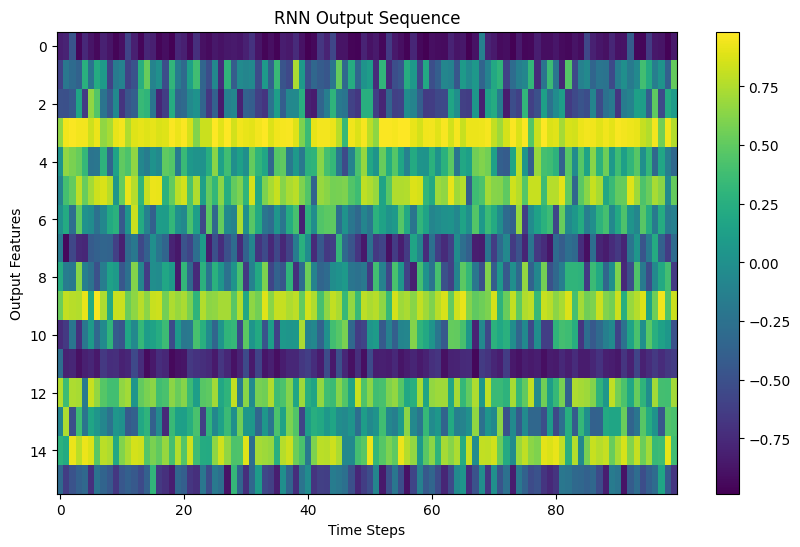

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

# 설정값 정의
# timesteps: 시퀀스의 길이(타임 스텝 수)
timesteps = 100
# num_features: 각 타임 스텝에서의 특성 수
num_features = 14

# 입력 데이터 초기화
# (1, timesteps, num_features) 크기의 랜덤 입력 데이터를 생성합니다. 여기서 첫 번째 차원은 배치 크기(batch size)로 설정되었습니다.
inputs = np.random.random((1, timesteps, num_features))  # 배치 차원 추가

# SimpleRNN 레이어 정의 및 실행
simple_rnn = layers.SimpleRNN(16, return_sequences=True)  # 16개의 유닛을 가진 SimpleRNN 레이어를 정의합니다. return_sequences=True로 설정하여 각 타임 스텝에서의 출력을 반환합니다.
# outputs는 입력 데이터를 SimpleRNN 레이어에 통과시킨 결과를 저장합니다. 이 결과는 전체 출력 시퀀스를 포함합니다.
outputs = simple_rnn(tf.convert_to_tensor(inputs, dtype=tf.float32))

# 결과 출력
# 출력 시퀀스의 형태를 출력합니다. 형태는 (배치 크기, 타임 스텝 수, 출력 특성 수)입니다.
# 예: Outputs shape: (1, 100, 16)
print("Outputs shape:", outputs.shape)

# 시각화
plt.figure(figsize=(10, 6))
plt.imshow(outputs.numpy()[0].T, aspect='auto', interpolation='nearest', cmap='viridis')
plt.colorbar()
plt.title('RNN Output Sequence')
plt.xlabel('Time Steps')
plt.ylabel('Output Features')
plt.show()


모델이 가변 길이 시퀀스를 처리해야 한다면 특히 유용합니다. 하지만 시퀀스 길이가 모두 같다면 완전한 입력 크기를 지정하는 것이 좋습니다. model.summary()가 출력 길이 정보를 제공할 수 있고(이 정보는 언제나 유용합니다.) 일부 성능 최적화를 활용할 수 있습니다.

케라스에 있는 모든 순환층 은 두가지 모드로 실행할 수 있습니다. 각 타임스텝의 출력을 모은 전체 시퀀스((batch_size, output_features) 크기의 랭크-3 텐서)를 반환하거나 입력 시퀀스의 마지막 출력((batch_size, output_features) 크기의 랭크-2 텐서)만 반환할 수 있습니다. 이 두 모드는 생성자의 return_sequences 매개변수로 제어할 수 있습니다. SimpleRNN을 사용하여 마지막 타임스텝의 출력만 반환하는 예를 살펴보죠

In [ ]:
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=False)(inputs)
print(outputs.shape)

(None, 16)


다음 예는 전체 상태 시퀀스를 반환 합니다.

In [ ]:
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=True)(inputs)
print(outputs.shape)

(None, 120, 16)


네트워크의 표현력을 증가시키기 위해 여러개의 순환층을 차례대로 쌓는 것이 유용할 때가 있습니다. 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정해야 합니다.

1/1 [==============================] - 0s 278ms/step
Outputs shape: (1, 120, 16)


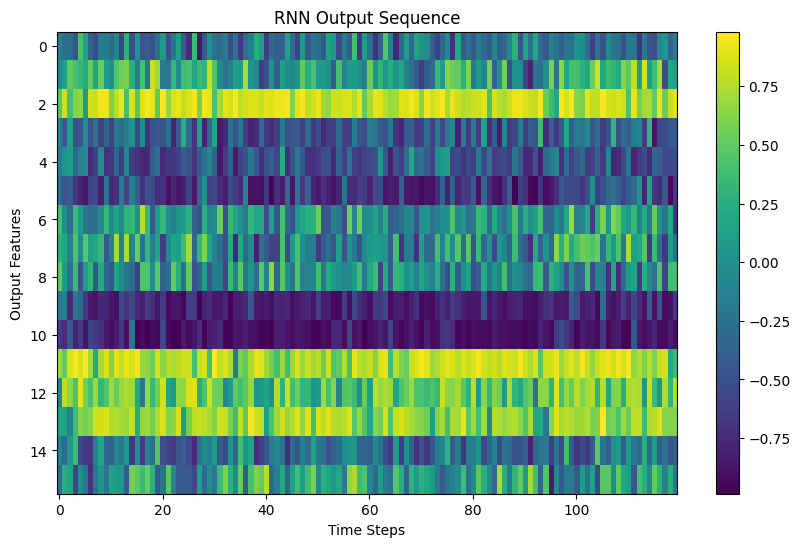

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

# 설정값 정의
steps = 120
num_features = 14

# 입력 텐서 정의
inputs = tf.keras.Input(shape=(steps, num_features))

# SimpleRNN 레이어 정의 및 실행
simple_rnn = layers.SimpleRNN(16, return_sequences=True)
outputs = simple_rnn(inputs)

# 모델 정의
model = tf.keras.Model(inputs, outputs)

# 무작위 데이터 생성 및 모델 예측 실행
input_data = np.random.random((1, steps, num_features))
output_data = model.predict(input_data)

# 결과 출력
print("Outputs shape:", output_data.shape)

# 시각화
plt.figure(figsize=(10, 6))
plt.imshow(output_data[0].T, aspect='auto', interpolation='nearest', cmap='viridis')
plt.colorbar()
plt.title('RNN Output Sequence')
plt.xlabel('Time Steps')
plt.ylabel('Output Features')
plt.show()


In [ ]:
inputs = keras.Input(shape=(steps, num_features))
x = layers.SimpleRNN(16, return_sequences=True)(inputs)
x = layers.SimpleRNN(16, return_sequences=True)(x)
outputs = layers.SimpleRNN(16)(x)
print(outputs.shape)

(None, 16)


실제로는 SimpleRNN 층을 거의 사용하지 않을 것입니다. 일반적으로 실전에 쓰기에는 너무 단순 합니다. SimpleRNN은 이론적으로 시간 t에서 이전의 모든 타임스텝의 정보를 유지할 수 있습니다. 하지만 실제로는 긴 시간에 걸친 의존성은 학습할 수 없습니다. 층이 많은 일반 네트워크(피트포워드 네트워크)에서 나타나는 것과 비슷한 현상인 그레이디언트 소실(vanishing gradient) 문제 때문입니다. 즉, 피드포워드 네트워크에 층을 많이 추가할 수록 훈련하기 어려워지는 것과 같습니다. 1990년대 초 호크라이터, 슈미트후버, 벤지오가 이런 현상에 대한 이론적인 원인을 연구했습니다.
다행히 SimpleRNN이 케라스에 있는 유일한 순환 층이 아닙니다. 이 문제를 해결하기 위해 고안된 LSTM과 GRU 층이 있습니다.

LSTM 층을 살펴보죠. 장, 단기 메모리(Long Short-Term Memory, LSTM) 알고리즘은 호크라이터와 슈미트후버가 1997년에 개발했습니다. 이 알고리즘은 그레이디언트 소실 문제에 대한 연구의 결정체 입니다.

이층은 앞서 보았던 SimpleRNN의 한 변종으로 정보를 여러 타임스텝에 걸쳐 나르는 방법이 추가됩니다.  처리할 시퀀스에 나란히 작동하는 컨베이어 벨트를 생각해 보세요. 시퀀스의 어느지점에서 추출된 정보가 컨베이어 벨트위로 올라가 필요한 시점의 타임스텝으로 이동하여 떨굽니다. 이것이 LSTM이 하는 일입니다. 나중을 위해 정보를 저장함으로써 처리과정에서 오래된 시그널이 점차 소실되는 것을 막하 줍니다. 이는 잔차 연결을 떠올리게 합니다. 두 아이디어는 매우 비슷합니다.
이를 자세하게 이해하기 위해 SimpleRNN 셀(층)을 생각해 보겠습니다. 가중치 행렬 여러개가 나오므로 출력을 나타내는 문자 o로 셀에 있는 W와 U행렬을 표현하겠습니다.(Wo와 Uo)

타임스텝을 가로질러 정보를 나르는 데이터 흐름을 추가해보죠. 타임스텝 n에서 이 값을 이동상태 c_t 라고 부르겠습니다. 여기에는 c는 이동을 의미합니다. 이 정보를 사용하여 셀이 다음과 같이 바뀝니다. 이동상태는 입력 연결과 순환 연결(상태)에 연결됩니다.(가중치) 행렬과 점곱한 후 편향을 더하고 활성화 함수를 적용하는 밀집 연결 층과 같은 변환을 통해), 그런 후 다음 타입스텝으로 전달될 상태에 영향을 미칩니다.(활성화 함수와 곱셈 연산을 통해), 개념적으로 보면 데이터를 실어 나르는 이 흐름이 다음 출력과 상태를 조절합니다. 여기까지는 간단합니다.


이제 복잡한 부분은 데이터 흐름에서 다음 이동 상태(c_t+1)가 계산되는 방식입니다. 여기에는 3개의 다른 변환이 관련되어 있습니다. 3개 모두 SimpleRNN과 같은 형태를 가집니다.


```
y = activation(dot(state_t, U) + dot(input_t, W) + b)
```
하지만 3개의 변환 모두 자신만의 가중치 행렬을 가집니다. 각각 i,f,k로 표시하겠습니다. 다음이 지금까지 설명한 내용입니다.



## LSTM 구조의 의사코드

```
output_t = activation(c_t) * activation(dot(input_t, Wo) + dot(state_t, Uo) + bo)
i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)
c_t+1 = i_t * k_t + c_t * f_t
```



i_t, f_t, k_t를 결합하여 새로운 이동상태(c_t+1)을 구합니다.

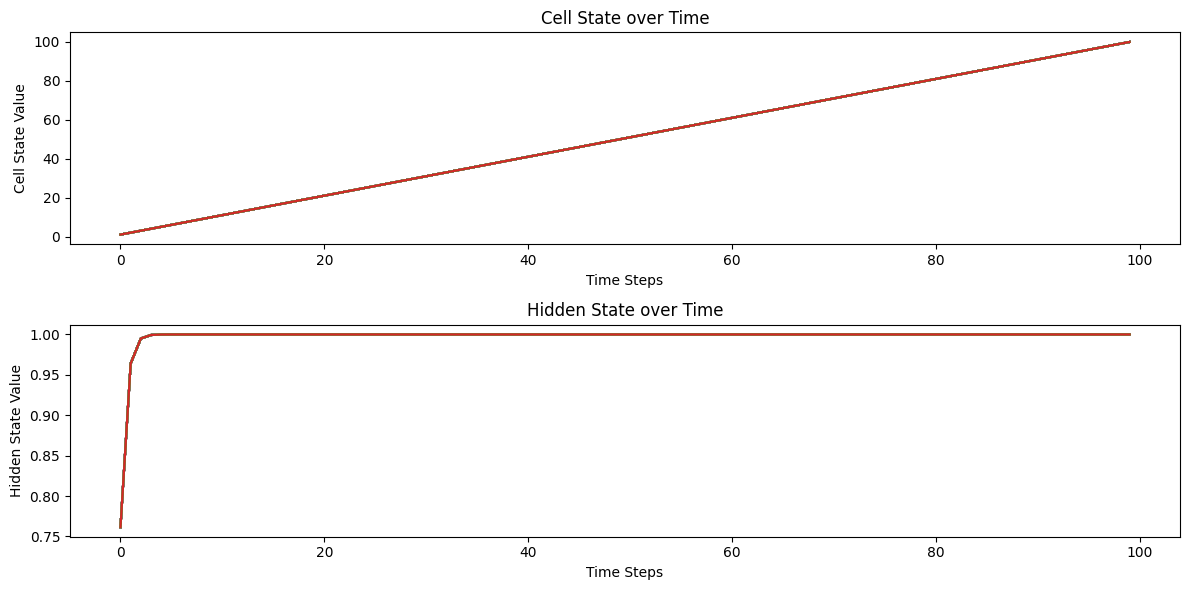

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 예시 입력 시퀀스 및 가중치 초기화
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))
c_t = np.zeros((output_features,))

Wo = np.random.random((input_features, output_features))
Uo = np.random.random((output_features, output_features))
bo = np.random.random((output_features,))

Wi = np.random.random((input_features, output_features))
Ui = np.random.random((output_features, output_features))
bi = np.random.random((output_features,))

Wf = np.random.random((input_features, output_features))
Uf = np.random.random((output_features, output_features))
bf = np.random.random((output_features,))

Wk = np.random.random((input_features, output_features))
Uk = np.random.random((output_features, output_features))
bk = np.random.random((output_features,))

# 활성화 함수 정의
def activation(x):
    return np.tanh(x)

# 결과 저장을 위한 리스트 초기화
successive_c = []
successive_state = []

# 입력 시퀀스의 각 타임스텝에 대해 반복
for input_t in inputs:
    i_t = activation(np.dot(state_t, Ui) + np.dot(input_t, Wi) + bi)
    f_t = activation(np.dot(state_t, Uf) + np.dot(input_t, Wf) + bf)
    k_t = activation(np.dot(state_t, Uk) + np.dot(input_t, Wk) + bk)
    c_t = i_t * k_t + c_t * f_t
    output_t = activation(c_t) * activation(np.dot(input_t, Wo) + np.dot(state_t, Uo) + bo)
    state_t = output_t

    # 결과 저장
    successive_c.append(c_t)
    successive_state.append(state_t)

# 최종 출력 및 상태 시각화
successive_c = np.array(successive_c)
successive_state = np.array(successive_state)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(successive_c)
plt.title('Cell State over Time')
plt.xlabel('Time Steps')
plt.ylabel('Cell State Value')

plt.subplot(2, 1, 2)
plt.plot(successive_state)
plt.title('Hidden State over Time')
plt.xlabel('Time Steps')
plt.ylabel('Hidden State Value')

plt.tight_layout()
plt.show()


이 연산들이 하는 일을 해석하면 각 의미에 대해 통찰을 얻을 수 잇씁니다. 예를 들어 c_t와 f_t의 곱셈은 이동을 위한 데이터 흐름에서 관련이 적은 정보를 의도적으로 삭제한다고 볼 수 있습니다. 한편 i_t와 k_t는 현재에 대한 정보를 제공하고 이동 트랙을 새로운 정보로 업데이트합니다. 하지만 결국 이런 해석은 큰의미가 없습니다. 이 연산들이 실제로 하는 일은 연산에 관련된 가중치 행렬에 따라 결정되기 때문입니다. 이 가중치는 엔드-투-엔드 방식을 학습됩니다. 이 과정은 훈련 반복마다 매번 새로 시작되며 이런저런 연산들에 특정 목적을 부여하기가 불가능합니다. RNN 셀의 구조는 가설 공간을 결정합니다. 훈련할 때 이 공간에서 좋은 모델 파라미터를 찾습니다. 셀의 구조가 셀이 하는 일을 결정하지 않습니다. 이는 셀의 가중치에 달려있습니다. 같은 셀이더라도 다른 가중치를 가지는 경우 매우 가른 작업을 수행합니다. 따라서 RNN셀을 구성하는 연산 조합은 엔지니어링적인 설계가 아니라 가설공간의 제약조건으로 해석하는 것이 낫습니다.
확실히 RNN 셀의 구현 방법 같은 제약 조건의 선택을 엔지니어보다(유전 알고리즘이나 강화학습 알고리즘 같은) 최적화 알고리즘에 맡기면 더 나아 보일것입니다. 미래에는 이런 식으로 네트워크를 만들게 될 것입니다. 요약하면 LSTM 셀의 구체적인 구조에 대해 이해할 필요가 전혀 없습니다. 이를 이해하는 것이 우리가 해야 할 일이 아닙니다. LSTM 셀의 역할만 기억하면 됩니다. 바로 과거 정보를 나중에 다시 주입하여 그레이디언트 소실 문제를 해결하는 것입니다.

## 순환 신경망의 고급 사용법
지금까지 다음과 같은 내용을 다루었습니다.
  * RNN이 무엇인지와 RNN의 작동 방식
  * LSTM이 무엇인지와 단순한 RNN보다 긴 시퀀스를 잘 처리하는 이유
  * 케라스 RNN층을 사용하여 시퀀스 테이터를 처리하는 방법

다음으로 RNN의 여러가지 고급 기능을 알아보겠습니다. 딥러닝 시퀀스 모델을 최대한 활용하는데 도움이 될 것입니다.
  * 순환드롭아웃 : 드롭아웃의 한 종류로 순환 층에서 과대적합을 방지하기 위해 사용합니다.
  * 스태킹 순환 층 : 모델의 표현능력을 증가시킵니다.(그대신 계산 비용이 많이 듭니다.)
  * 양방향 순환 층 : 순환 네트워크에 같은 정보를 다른 방향으로 주입하여 정확도를 높이고 기억ㅇ르 좀더 오래 유지시킵니다.
  

## 과대적합을 감소하기 위해 순환 드롭아웃 사용하기
상식 수준의 기준점을 넘어선 첫 모델인 LSTM기반 모델을 다시 사용해 보겠습니다. 훈련 손실과 검증 손실 곡선을 보면 모델이 과대적합인지 알 수 있습니다. 몇 번의 에포크 이후에 훈련 손실과 검증 손실이 현저하게 벌어지기 시작합니다. 이런 현상을 해결하기 위해 잘 알려진 드롭아웃 기법을 이미 보았습니다. 훈련 데이터를 층에 주입할 때 ㅔㄷ이터에 있는 우연한 상관관계를 깨드리기 위해 입력 층의 유닛을 랜덤하게 끄는 기법입니다. 하지만 순환 신경망에 드롭아웃을 올바르게 적용하는 일은 간단하지 않습니다.

순환 층 이전에 드롭아웃을 적용하면 규제에 도움이 되는 것보다 학습에 더 방해되는 것으로 오랫동안 알려졌습니다. 2016년 야린 갈이 베이지안 딥러닝에 관한 박사논문에서 순환 네트워크에 적절하게 드롭하웃을 사용하는 방법을 알아냈습니다.

 타임스텝마다 랜덤하게 드롭아웃 마스크를 바꾸는 것이 아니라 동일한 드롭아웃 마스크(동일한 패턴으로 유닛을 드롭아웃합니다.)를 모든 타임스텝에 적용해야 합니다. GRU나 LSTM같은 순환 게이트에 의해 만들어진느 표현을 규제하려면 순환 층 내부 계산에 사용된 활성화 함수에 타임스텝마다 동일한 드롭아웃 마스크를 적용해야 합니다.(순환 드롭아웃 마스크), 모든 타임스뎁에 동일한 드롭아웃 마스크를 적용하면 네트워크가 학습오차를 타임스텝에 걸쳐 적절하게 전파할 수 있습니다. 타임스텝마다 랜덤한 드롭아웃 마스크를 적용하면 오차 신호가 전파되는 것을 방해하고 학습과정에 해를 끼칩니다.

야린 갈은 케라스를 사용하여 연구했고 케라스 순환 층에 이 기능을 구현하는 데 도움을 주었습니다. 케라스에 있는 모든 순환 층은 2개의 드롭아웃 매개변수를 가지고 있습니다. dropout은 층의 입력에 대한 드롭아웃 비율을 정하는 부동 소수점 값입니다. recurrent_dropout은 순환 상태의 드롭아웃 비율을 정합니다. 첫 번째 LSTM 예제의 LSTM 층에 순환 드롭아웃을 적용하여 과대적합에 어떤 영향을 미치는지 살펴보겠습니다.

드롭아웃 덕분에 규제를 위해 네트워크 크기에 신경 쓸 필요가 없습니다. 2배 더 많은 유닛을 가진 LSTM 층을 사용하겠습니다.(규제가 없으면 이 네트워크는 시작하자마자 과대적합됩니다. 직접 테스트해보세요) 아마도 표현력이 더 좋아질 것입니다. 드롭아웃으로 규제된 네트워크는 완전히 수렴하는 데 언제나 훨씬 더 오래 걸립니다. 따라서 에포크를 2배 더 늘려 네트워크를 훈련하겠습니다.


In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.h5", save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=callbacks)



Epoch 1/50
819/819 [==============================] - 245s 297ms/step - loss: 28.1933 - mae: 3.9244 - val_loss: 9.8589 - val_mae: 2.4463
Epoch 2/50
819/819 [==============================] - 243s 297ms/step - loss: 14.9472 - mae: 3.0024 - val_loss: 9.4414 - val_mae: 2.3939
Epoch 3/50
819/819 [==============================] - 255s 311ms/step - loss: 14.1785 - mae: 2.9196 - val_loss: 9.3804 - val_mae: 2.3809
Epoch 4/50
819/819 [==============================] - 233s 284ms/step - loss: 13.6649 - mae: 2.8643 - val_loss: 9.1006 - val_mae: 2.3427
Epoch 5/50
819/819 [==============================] - 237s 289ms/step - loss: 13.1902 - mae: 2.8125 - val_loss: 9.1635 - val_mae: 2.3534
Epoch 6/50
819/819 [==============================] - 230s 280ms/step - loss: 12.8249 - mae: 2.7750 - val_loss: 9.1389 - val_mae: 2.3503
Epoch 7/50
819/819 [==============================] - 239s 292ms/step - loss: 12.4922 - mae: 2.7383 - val_loss: 9.3964 - val_mae: 2.3764
Epoch 8/50
819/819 [=====================

성공입니다. 20번째 에포크까지 과대적합이 일어나지 않았습니다. 최저 2,27도의 검증 MAE와 최저 2.45도의 테스트 MAE를 달성했습니다. 나쁘지 않습니다.

## RNN 런타임 성능
위에 있는 모델 처럼 파라미터 개수가 매우 적은 순환 신경망은 GPU보다 멀티코어 CPU에서 더 빠른 경향이 있습니다. 작은 행렬 곱셈만 포함하여 for 루프때문에 연속된 곱셈이 잘 병렬화되지 않기 때문입니다. 하지만 대규모 RNN은 GPU가 도움이 될 수 있습니다.

기본 매개변수로 설정된 케라스 LSTM과 GPU층을 GPU에서 사용할 때 cuDNN 커널을 활용할 수 있습니다. cuDNN은 NVIDIA가 제공하는 고도로 최적화된 저수준 알고리즘 구현입니다. 항상 그렇듯이 cuDNN 커널은 빠르지만 유연하지 못한 장점을 가집니다. 기본 커널에서 지원하지 않는 것을 수행하려면 속도가 크게 느려진느 것을 경험할 것입니다. 이 때문에 다소간 NVIDIA가 제공하는 기능을 고수하게 됩니다. 예를 들어 LSTM과 GRU cuDNN 커널은 순환 드롭아웃을 지원하지 않습니다. 따라서 층에 순환드롭아웃을 추가하면(계산 비용은 동일하지만) 일반적으로 GPU보다 2배에서 5배 정도 느린 일반 텐서플로 구현을 사용하게 됩니다.

cuDNN을 사용할 수 없을 때 RNN 층의 속도를 높이는 방법으로 층을 언롤링(unrolling)할 수 있습니다. for 루프를 언롤링하면 루프를 제거하고 루프의 내용을 단순히 N번 기술합니다. RNN의 for 루프의 경우 언롤링하면 텐서플로가 계산 그래프를 최적화하는 데 도움이 될 수 있습니다. 하지만 RNN의 메모리 사용량을 상당히 증가시킵니다. 따라서 (100스텝 또는 그 이하의 ) 비교적 작인 시퀀스에만 가능합니다. 또한 모델이 데이터에 있는 타임스텝 수를 미리알 수 있는 경우에만 사용할 수 있습니다.(즉, Input() 함수에 전달하는 shope 매개변수 값에 None 항목이 없는 경우입니다.) 다음과 같이 사용합니다.



```
inputs = Keras.Input(shape=(sequence_length, num_features))
## sequence_length는 None이 되어서는 안됩니다.
x = layers.LSTM(32, recurrent_dropout=0.2 , unroll=True)(inputs)
## unroll=True를 전달하여 언롤링합니다.
```



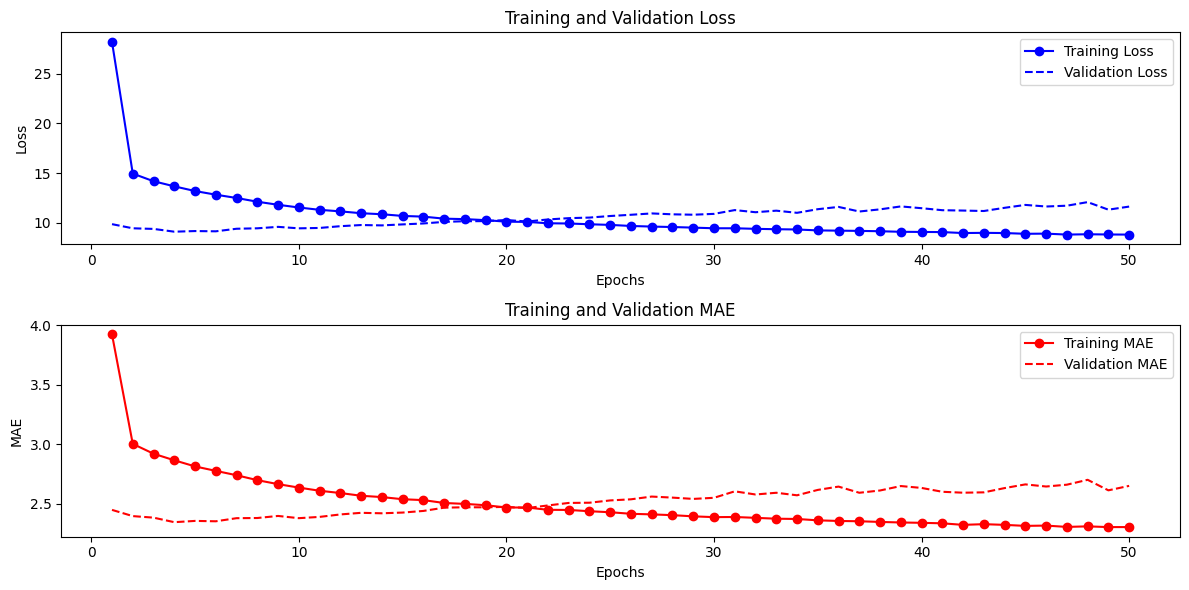

In [ ]:
# 학습 결과 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 6))

# 손실 시각화
plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'b--', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE 시각화
plt.subplot(2, 1, 2)
plt.plot(epochs, mae, 'ro-', label='Training MAE')
plt.plot(epochs, val_mae, 'r--', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

## 스태킹 순환층
과대적합은 더이상 없지만 성능상 병목이 있는 것 같으므로 네트워크의 용량과 표현력을 늘려야 합니다. 일반적인 머신러닝 작업흐름을 기억하세요.(드롭아웃 등을 사용하여 과대적합을 줄이는 기본단계를 거쳤다 가정하고) 과대적합이 일어날 때까지 모델의 용량을 늘리는 것이 좋습니다. 너무 많이 과대적합되지 않는 한 아직 충분한 용량에 도달한 것이 아닙니다.

네트워크의 용량을 늘리려면 일밙거으로 층에있는 유닛의 개수를 늘리거나 층을 더 많이 추가합니다. 순환 층 스태킹은 더 강력한 순환 네트워크를 만드는 고전적인 방법입니다. 예를 들어 얼마전까지 구글 번역 알고리즘은 7개의 대규모 LSTM층을 쌓은 대규모 모델을 사용했습니다.
케라스에서 순환 층을 차례대로 쌓으려면 모든 중간층은 마지막 타임스텝 출력만 아니고 전체 시퀀스(랭크-3 텐서)를 출력해야 합니다. 이미 배웠듯이 return_sequences=True 로 지정하면 됩니다.

다음예에서 드롭아웃 규제를 사용한 2개의 순환 층을 스태킹 해보겠습니다. 변화를 주어 LSTM대신에 GRU를 사용하겠습니다. GRU는 LSTM과 매우 비슷합니다. GRU를 LSTM구조의 간단하고 간소화된 버전으로 생각할 수 있습니다. 순환 신경망이 소규모 연구 커뮤니티에서 새로운 관심을 받기 시작했을때 조경현 등이 2014년 GRU를 소개했습니다.

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.GRU(32, recurrent_dropout=0.5, return_sequences = True)(inputs)
x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_stacked_gru_dropout.h5", save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=callbacks)
model = keras.models.load_model("jena_stacked_gru_dropout.h5")
print(f'Test MAE: {model.evaluate(test_dataset)[1]:.2f}')

Epoch 1/50
819/819 [==============================] - 192s 230ms/step - loss: 24.7038 - mae: 3.6766 - val_loss: 9.6031 - val_mae: 2.4058
Epoch 2/50
819/819 [==============================] - 183s 223ms/step - loss: 14.1156 - mae: 2.9092 - val_loss: 9.2456 - val_mae: 2.3599
Epoch 3/50
819/819 [==============================] - 203s 248ms/step - loss: 13.2370 - mae: 2.8175 - val_loss: 9.0430 - val_mae: 2.3339
Epoch 4/50
819/819 [==============================] - 184s 224ms/step - loss: 12.6789 - mae: 2.7588 - val_loss: 9.0105 - val_mae: 2.3358
Epoch 5/50
819/819 [==============================] - 183s 223ms/step - loss: 12.2186 - mae: 2.7092 - val_loss: 8.6756 - val_mae: 2.2812
Epoch 6/50
819/819 [==============================] - 183s 223ms/step - loss: 11.7158 - mae: 2.6613 - val_loss: 8.8675 - val_mae: 2.3218
Epoch 7/50
819/819 [==============================] - 185s 225ms/step - loss: 11.4036 - mae: 2.6221 - val_loss: 8.9262 - val_mae: 2.3155
Epoch 8/50
819/819 [=====================

다음은 실행결과 입니다. 2.39도의 테스트 MAE를 달성했습니다.(기준성능보다 8.8% 향상되었습니다) 추가된 층이 극적이지는 않지만 성능을 조금 향상시켰습니다. 여기에서는 네트워크의 용량을 늘리는 것이 도움이 되지 않는다고 볼 수 있습니다.

In [ ]:
# 시각화 코드
# 훈련 및 검증 손실 시각화
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 훈련 및 검증 MAE 시각화
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## 양방향 RNN 사용하기

이 절에서 소개할 마지막 기법은 양방향 RNN입니다. 양방향 RNN은 RNN의 한 변종이고 특정 작업에서 기본 RNN보다 훨씬 좋은 성능을 냅니다. 자연어 처리에서는 맥가이버 칼이라고 할 정도로 즐겨 사용됩니다.

RNN은 특히 순서에 민감합니다. 즉, 입력 시퀀스의 타입스텝 순서대로 처리합니다. 타임스텝을 섞거나 거꾸로 하면 RNN이 시퀀스에서 학습하는 표현을 완전히 바꾸어 버립니다. 이는 온도예측치 처럼 순서에 의미가 있는 문제에 잘 맞는 이유이기도 합니다. 양방향 RNN은 RNN이 순서에 민감하다는 성질을 사용합니다. 앞서 보았던 GRU나 LSTM 같은 RNN 2개를 사용합니다. 각 RNN은 입력시퀀스르 한 방향(시간 순서나 반대 순서)으로 처리한 후 각 표현을 합칩니다. 시퀀스를 양쪽 방향으로 처리하기 때문에 양방향 RNN은 단방향 RNN이 놓치기 쉬운 패턴을 감지할 수 있습니다.

놀랍게도 이 절에 있는 RNN 층이 시간의 순서대로 (오래된 타임스텝이 먼저나오도록) 시퀀스를 처리하는 것은 근거없는 결정입니다. 적어도 이 결정을 궁금해 하지 않았습니다. 시간의 반대 방향으로(최근 타임스텝이 먼저나오도록)입력 시퀀스를 처리하면 만족할 만한 RNN 성능을 낼 수 있을까요? 이를 시도해보고 결과를 확인해보겠습니다. 해야 할 일은 입력 시퀀스를 시간 차원을 따라 거꾸로 생성하는 데이터 제너레이터를 만드는 것 뿐입니다. (제너레이터 함수의 마지막 줄을 yield samples[:, ::-1, :], targets 으로 바꿉니다.) 위의 첫 번째 예제와 동일하게 LSTM 기반의 모델을 훈련합니다.

순서를 뒤집은 LSTM은 상식 수준의 기준점보다도 성능이 낮습니다. 이 경우에는 시간 순서대로 처리하는 것이 중요한 역할을 합니다. 사실 이는 당연합니다. 일반적으로 LSTM 층은 먼 과거보다 최근 내용을 잘 기억합니다. 또한, 최근에 가까운 날씨 데이터 포인트 일수록 오래던 데이터 포인트 보다 예측에 유용합니다.(상식 수준의 기준점이 꽤 강력한 이유입니다.) 따라서 시간 순서대로 처리하는 네트워크가 거꾸로 처리하는 것보다 성능이 높아야만 합니다.

하지만 자연어 처리를 포함하여 다른 많은 문제에서는 그렇지 않습니다. 문장을 이야하는 데 단어의 중요성은 단어가 문장 어디에 놓여 있는지에 따라 결정되지 않습니다. 텍스트 데이터셋에는 순서를 뒤집어 처리하는 것이 시간 순서대로 처리하는 것과 거의 동일하게 잘 작동합니다. 사람은 텍스트를 거꾸로 읽을 수 있습니다.(시도해 보세요!) 언어를 이해하는 데 단어의 순서가 중요하지만 결정적이지 않습니다.

거꾸로 된 시퀀스에서 훈련한 RNN은 원래 시퀀스에서 훈련한 것과는 다른 표현을 학습합니다. 이와 비슷하게 시작할 때 죽고 마지막 날 태어나는 삶처럼 실제 세상의 시간이 거꾸로 흘러간다면 우리의 정신세계는 달라질 것이빈다. 머신 러닝에선 다른 표현이 유용하다면 항상 사용할 가치가 있습니다. 이 표현이 많이 다를수록 더 좋습니다. 이 표현이 데이터를 바라보는 새로운 시각을 제공하고 다른 방식에서는 놓칠 수 있는 데이터의 특징을 잡아냅니다. 이런 표현은 작업성능을 올리는데 도움을 줍니다. 이것이 앙상블 개념입니다.

양방향 RNN은 이 아이디어를 사용하여 시간 순서대로 처리하는 RNN의 성능을 향상시킵니다. 입력 시퀀스를 양쪽 방향으로 바라보기 때문에, 잠재적으로 풍부한 표현을 얻고 시간 순서대로 처리할 때 놓칠 수 있는 패턴을 감지할 수 있습니다.

케라스에서는 Bidirectional 층을 사용하여 양방향 RNN을 만듭니다. 이 클래스는 첫번째 매개변수로 순환 층의 객체를 전달받습니다. bidirectional 클래스는 전달받은 순환 층으로 새로운 두번째 객체를 만듭니다. 하나는 시간 순서대로 입력 시퀀스를 처리하고, 다른 하나는 반대 순서로 입력시퀀스를 처리합니다. 온도 예측작업에 이를 적용해 보죠


In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

이 모델은 평범한 LSTM 층만큼 성능이 좋지 않습니다. 이유는 쉽게 이해할 수 있습니다. 모든 예측 성능은 시간 순서대로 처리하는 네트워크의 절반에서 옵니다. 시간 반대 순서로 처리하는 절반은 이런 작업에 성능이 매우 좋지 않기 때문입니다.(최근 정보가 오래전 정보보다 훨씬 더 중요합니다.) 동시에 시간 반대 순서로 처리하는 층 때문에 네트워크의 용량이 2배가 되고 훨씬 더 일찍 과대적합이 시작됩니다.

하지만 양방향 RNN은 텍스트 데이터 또는 순서가 중요한 (하지만 사용하는 순서는 중요하지 않은) 다른 종류의 데이터에 잘 맞습니다. 사실(다음 장에서 배울 트랜스포머 구조가 등장하기 전) 2016년 잠시 동안 양방향 LSTM 층이 많은 자연어 처리 작업에서 최고 수준의 성능을 냈습니다.

## 더 나아가서

온도 예측 문제의 성능을 향상하기 위해 시도해 볼 수 있는 것이 많이 있습니다.
  * 스태킹한 각 순환 층의 유닛개수와 드롭아웃의 양을 조정합니다 .지금 설정은 대부분 임의로 한 것이라 최적화가 덜 되었을 것입니다.
  * RMSprop 옵티마이저의 학습률을 조정하거나 다른 옵티마이저를 사용합니다.
  * 순환 층 위에 놓을 회귀 모델을 위해 하나가 아니라 여러개의 Dense 층을 쌓습니다.
  * 모델의 입력을 개선합니다 .더 길거나 짧은 시퀀스를 테스트 해보거나 샐플링 간격(smapling_rate)을 바꿉니다. 또는 특성 공학을 수행합니다.

늘 그렇듯이 딥러닝은 과학보다는 예술에 가깝습니다. 어떤 문제에 적합하거나 그렇지 않은 가이드라인은 제시할 수 있지만 결국 모든 데이터 셋은 다릅니다. 경험을 바탕으로 여러가 지 전략을 평가해 보아야 합니다. 현재는 문제를 해결하는 최선의 방법을 미리 알 수 있는 이론은 없습니다. 여러시도를 반복해야 합니다.

필자 경험으로 보면 머신 러닝이 아닌 기준점에서 10%를 향상시키는 것이 이 데이터 셋에서 최선일 것입니다. 이는 훌륭하지는 않지만 의미있는 결과입니다. 넓은 범위에 걸쳐 여러지역의 날씨 데이터가 있다면 가까운 미래의 날씨를 예측하기 쉽지만 한 직역의 측정값만 있다면 예측하기 어렵습니다. 현재 위치의 날씨 변화는 주변 지역의 날씨 패턴에 따라 달라집니다.



### 주식시장과 머신러닝
일부 사람들은 여기에서 소개한 기법을 주식 시장의 증권 가격(또는 환율 등)을 예측하는데 사용하려고 할 것입니다. 하지만 주식 시장은 날씨 패턴 같은 자연현상과는 훨씬 다른 통계적 특성이 있습니다. 주식 시장에서 과거 성과는 미래의 기대 수익을 위한 좋은 예측 특성이 아닙니다. 이는 마치 백미러를 보고 운전하는 것과 같습니다. 머신러닝은 날씨, 전력사용량, 상점안의 유동인구 등 과거를 미래에 대한 좋은 예측 지표로 쓸 수 있는 데이터셋에 적용할 수 있습니다.

모든 거래는 기본적으로 정보 차익거래(information arbitrage)라는 것을 항상 기억하세요. 시장에 참여하고 있는 다른 사람이 놓친 데이터나 통찰을 활용하여 이익을 얻습니다. 주식 시장에서 이기기 위해 잘 알려진 머신 러닝 기법과 공개된 데이터를 사용하면 결국 막다른 골목에 다다를 것입니다. 다른 사람들과 비교해서 정보 이점이 없기 때문입니다. 아무것도 얻지 못하고 시간과 자원을 낭비할 가능성이 높습니다.



#요약


  * 새로운 문제를 해결할 때는 선택한 지표에서 상식 수준의 기준점을 설정하는 것이 좋습니다. 기준점을 가지고 있지 않으면 실제로 향상되었는지 알 수 없습니다.

  * 추가 비용이 합리적인지 판단하기 위해 계산 비용이 높은 모델 전에 간단한 모델을 시도합니다. 이따금 간단한 모델이 최선일 경우가 있습니다.

  * 시간 순서가 중요한 데이터, 특히 시계열 데이터가 있다면 순환 신경망이 적합합니다. 시계열 데이터를 펼쳐서 처리하는 모델의 성능을 쉽게 앞지를 것입니다. 케라스에서 핵심적인 RNN 층 2개는 LSTM층과 GRU층입니다.

  * 순환 네트워크에 드롭아웃을 사용하려면 타임스텝 동안 일정한 드롭아웃 마스크와 순환 드롭아웃 마스크를 사용해야 합니다. 둘 다 케라스 순환 층에 포함되어있습니다. 순환 층에 있는 recurrent_dropout 매개변수를 사용하면 됩니다.

  * 스태킹 RNN 단일 RNN 층보다 더 강력한 표현 능력을 제공합니다. 하지만 계산 비용이 많이 들기 때문에 항상 시도할 가치가 있지는 않습니다.(기계 번역 같은) 복잡한 문제에서 확실히 도움이 되지만 작고 간단한 문제에서는 항상 그렇지 않습니다.
   